In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import random
import time
import chess
import matplotlib.pyplot as plt 
import re
from itertools import combinations 
import operator
import statistics as stats
import math
import chess.engine
from sklearn.cluster import KMeans

In [2]:
class Apriori:
    
    def __init__(self, data, min_sup):
        
        self.data = data
        self.mst = min_sup
        self.L = []
        self.C = []
        self.conclusion = '' #returns nothing if we get to the k that is the same length as the longest tuple
        
        self.limiter = 0
        
        self.start()
        
    def start(self):
        l = {} 
        c = {}
        #print(self.data)
        for t in self.data:
            t = t.split(' ')### used in chess project remove it when done
            #print(t)
            if len(t) > self.limiter:
                self.limiter = len(t)
            
            for x in t:
                if x not in c: #counts items in data
                    c[x] = 1
                else:
                    c[x] += 1    
                    
        for i in c:
            if c[i] >= self.mst: #finds all items that are frequent
                l[i] = c[i]
            else:
                pass
        
        self.L.append(l) #adds list to L 
        self.find_frequent_items()
        self.print_results()
        
    def find_frequent_items(self): #finds respective frequent items of certain lengths 
        for i in range(1, self.limiter): 
            #print(self.L)
            C = {}
            L = {}
            #print(list(self.L[i - 1].keys()))
            current_C = self.apriori_gen(list(self.L[i - 1].keys()), i) #generates apriori using previous L
            #print(current_C)
            for c in current_C: #for every candidate 
                for t in self.data: 
                    t = t.split(' ')### used in chess project remove it when done
                    result = all(cand in t for cand in c) #returns boolean if all items of candidate are in tuple
                    if result: 
                        if c not in C: #if so add count them 
                            C[c] = 1
                        else:
                            C[c] += 1
                        
            for x in C: #ignores all candidates that are below threshold
                if C[x] >= self.mst:
                    L[x] = C[x]
                else:
                    pass 
                
            if len(L) == 0:
                self.conclusion = 'No frequent items were found after this point.' #if there are no items in L, don't bother continuing 
                break
            #print(C)
            self.L.append(L)      
    
    def apriori_gen(self, L, num):
        #print(L)
        C = []
        for i in self.data:
            i = i.split(' ') ### used in chess project remove it when done
            comb = combinations(i, num + 1) #finds all combinations of every tuple up to granted number
            for c in comb: 
                
                cand_bool = self.has_infrequent_subset(c, L) #for every candidate check if it has an infrequent subset 
                if cand_bool == False and c not in C:
                    if c not in C:
                        C.append(c) # if not add to C
                    else:
                        pass
                
        #print(num, C)        
        return C
    
    def has_infrequent_subset(self, cand, L):
        #print(L)
        comb = list(combinations(cand, len(cand) - 1))
        #print(comb)
        
        for i in comb: #checks if there are any infrequent subsets for a given candidate
            #print(list(self.L[len(cand) - 2].keys()))
            infrequent_subset =  False
            for j in L:

                if len(cand) == 2:
                    sub = [j]
                    
                else:
                    sub = j
                
                result = all(x in sub for x in i)
                if result == True:
                    infrequent_subset = False
                    break 
                    
                else:
                    infrequent_subset = True
            
            if infrequent_subset == True:
                return True

        return infrequent_subset
    
    def print_results(self):
        count = 1
        for i in self.L:
            print('L', count, ':')
            print(i, '\n')
            
            count += 1  
        print(self.conclusion)

In [3]:
lichess_games = pd.read_csv("E:/Users/Justin/Desktop/Course Folders 2020/DSC440Mining/games.csv")

In [4]:
lichess_games.shape

(20058, 16)

In [5]:
#lichess_games['White_moves'] = None
#lichess_games['Black_moves'] = None

lichess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [6]:
lichess = lichess_games.drop(columns = ['id', 'rated', 'created_at', 'last_move_at', 'increment_code', 'white_id', 'black_id', 'opening_eco'])
lichess.head(3)

,turns,victory_status,winner,white_rating,black_rating,moves,opening_name,opening_ply
0,13,outoftime,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,5
1,16,resign,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,4
2,61,mate,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,3


In [8]:
lichess['opening_moves'] = None
for i in range(lichess.shape[0]):
    sub = lichess['moves'][i].split(' ')[:lichess['opening_ply'][i]]
    s = ''
    for j in sub:
        s += j + ' '
    
    lichess['opening_moves'][i] = s[:-1]

E:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


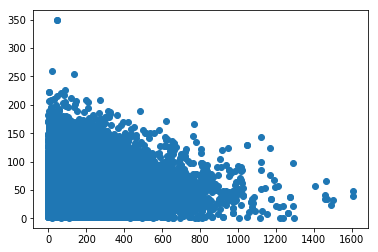

In [9]:
differences = np.absolute(np.asarray(lichess['white_rating']) - np.asarray(lichess['black_rating']))
#print(max(differences))
plt.scatter(differences, lichess['turns'])
plt.show()

In [10]:
resignations = lichess[lichess['victory_status'] == 'resign']

print(resignations.shape)
print(lichess.shape) ## ??

(11147, 9)
(20058, 9)


In [11]:
short = lichess[lichess['turns'] < 15]
short.shape

(1037, 9)

In [12]:
short = resignations[resignations['turns'] < 10]
short.shape

(422, 9)

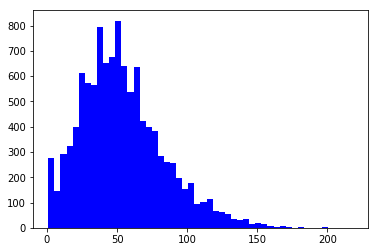

max:  218
min:  1
std:  29.665325813884206
mean:  53.91253251996053
median:  50


In [13]:
plt.hist(resignations['turns'], bins = 50, color = 'b')
plt.show()
print('max: ', max(resignations['turns']))
print('min: ', min(resignations['turns']))
print('std: ', stats.stdev(resignations['turns']))
print('mean: ', stats.mean(resignations['turns']))
print('median: ', stats.median(resignations['turns']))

In [14]:
timeout = lichess[lichess['victory_status'] == 'outoftime']
print(timeout.shape)

(1680, 9)


max:  28
min:  1
std:  2.797151810630093
mean:  4.8169807558081565
median:  4.0


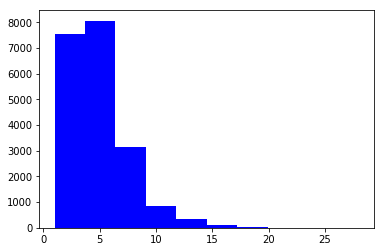

In [15]:
plt.hist(lichess['opening_ply'], color = 'b')
print('max: ', max(lichess['opening_ply']))
print('min: ', min(lichess['opening_ply']))
print('std: ', stats.stdev(lichess['opening_ply']))
print('mean: ', stats.mean(lichess['opening_ply']))
print('median: ', stats.median(lichess['opening_ply']))

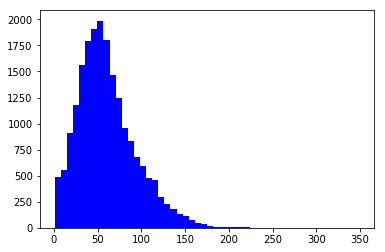

max:  349
min:  1
std:  33.57058475353712
mean:  60.46599860404826
median:  55.0


In [16]:
plt.hist(lichess['turns'], bins = 50, color = 'b')
plt.show()
print('max: ', max(lichess['turns']))
print('min: ', min(lichess['turns']))
print('std: ', stats.stdev(lichess['turns']))
print('mean: ', stats.mean(lichess['turns']))
print('median: ', stats.median(lichess['turns']))

1605


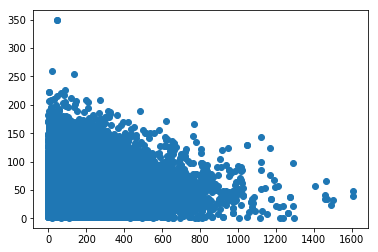

In [17]:
differences = np.absolute(np.asarray(lichess['white_rating']) - np.asarray(lichess['black_rating']))
print(max(differences))
plt.scatter(differences, lichess['turns'])
plt.show()

In [18]:
max(lichess['opening_ply'])

28

In [19]:
### separating skill base

In [20]:
opening_core = [lichess['opening_name'][i].split(':')[0] for i in range(lichess_games.shape[0])]
lichess['opening_core'] = opening_core

In [21]:
lowgames = lichess[1000 >= lichess['white_rating']]
lowgames = lowgames[1000 >= lowgames['black_rating']]

In [22]:
midlowgames = lichess[lichess['white_rating'] > 1000]
midlowgames = midlowgames[1500 >= midlowgames['white_rating']]
midlowgames = midlowgames[midlowgames['black_rating'] > 1000]
midlowgames = midlowgames[2000 >= midlowgames['black_rating']]

In [23]:
midhighgames = lichess[lichess['white_rating'] > 1500]
midhighgames = midhighgames[2000 >= midhighgames['white_rating']]
midhighgames = midhighgames[midhighgames['black_rating'] > 1500]
midhighgames = midhighgames[2000 >= midhighgames['black_rating']]

In [24]:
highgames = lichess[lichess['white_rating'] > 2000]
highgames = highgames[highgames['black_rating'] > 2000]

In [25]:
print(lowgames.shape)
print(midlowgames.shape)
print(midhighgames.shape)
print(highgames.shape)

(37, 10)
(7530, 10)
(7041, 10)
(849, 10)


In [81]:
highgames.head()

,turns,victory_status,winner,white_rating,black_rating,moves,opening_name,opening_ply,opening_moves,opening_core
636,86,resign,black,2306,2405,e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5 Nxe5 d4 Nc6 d5 Bb4 ...,Four Knights Game: Halloween Gambit,7,e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5,Four Knights Game
637,58,resign,black,2422,2386,e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 exd6 Qxd6 ...,Sicilian Defense: Alapin Variation | Smith-Mo...,8,e4 c5 d4 cxd4 c3 Nf6 e5 Nd5,Sicilian Defense
638,50,resign,black,2373,2356,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 ...,Sicilian Defense: Lasker-Pelikan Variation | ...,17,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 ...,Sicilian Defense
639,62,resign,black,2325,2338,d4 Nf6 Nf3 d5 g3 Bf5 Bg2 e6 O-O Be7 c4 c6 Nc3 ...,Queen's Pawn Game: Symmetrical Variation | Ps...,5,d4 Nf6 Nf3 d5 g3,Queen's Pawn Game
642,43,resign,white,2329,2017,d4 Nf6 c4 c5 d5 e6 Nc3 exd5 cxd5 d6 e4 g6 f4 B...,Benoni Defense: Taimanov Variation,15,d4 Nf6 c4 c5 d5 e6 Nc3 exd5 cxd5 d6 e4 g6 f4 B...,Benoni Defense


In [82]:
start = time.time()
x = list(range(0, highgames.shape[0]))
x = random.choices(x, k=400)
apriori = Apriori(highgames.iloc[x, -2], 50)
end = time.time()
print(end - start)

L 1 :
{'d4': 250, 'Nf6': 219, 'Nf3': 227, 'e6': 118, 'c4': 115, 'd5': 153, 'Nc3': 149, 'c5': 114, 'd6': 74, 'g6': 55, 'e4': 236, 'O-O': 58, 'e5': 96, 'Nc6': 94} 

L 2 :
{('d4', 'Nf6'): 171, ('d4', 'Nf3'): 138, ('d4', 'e6'): 101, ('d4', 'c4'): 89, ('d4', 'd5'): 119, ('d4', 'Nc3'): 115, ('Nf6', 'Nf3'): 153, ('Nf6', 'e6'): 71, ('Nf6', 'c4'): 90, ('Nf6', 'd5'): 78, ('Nf6', 'Nc3'): 111, ('Nf3', 'e6'): 64, ('Nf3', 'c4'): 69, ('Nf3', 'd5'): 69, ('Nf3', 'Nc3'): 96, ('e6', 'c4'): 60, ('e6', 'd5'): 59, ('e6', 'Nc3'): 67, ('c4', 'd5'): 58, ('c4', 'Nc3'): 74, ('d5', 'Nc3'): 66, ('d4', 'c5'): 78, ('d4', 'd6'): 56, ('d4', 'e4'): 126, ('Nf6', 'c5'): 59, ('Nf6', 'd6'): 54, ('Nf6', 'e4'): 106, ('c4', 'e6'): 60, ('c4', 'Nf3'): 69, ('c5', 'Nc3'): 55, ('c5', 'Nf3'): 77, ('c5', 'e4'): 87, ('d5', 'e6'): 59, ('d5', 'Nf3'): 69, ('d5', 'e4'): 73, ('e6', 'Nf3'): 64, ('e6', 'e4'): 56, ('Nc3', 'd6'): 50, ('Nc3', 'Nf3'): 96, ('Nc3', 'e4'): 94, ('d6', 'Nf3'): 63, ('d6', 'e4'): 65, ('Nf3', 'e4'): 134, ('Nf6', 'e5'):

{('d4', 'Nf6', 'Nf3', 'c4'): 52, ('d4', 'Nf6', 'Nf3', 'Nc3'): 72, ('d4', 'Nf6', 'c4', 'Nc3'): 59, ('d4', 'Nf6', 'c4', 'Nf3'): 52, ('d4', 'Nf6', 'Nc3', 'Nf3'): 72, ('d4', 'Nf6', 'Nc3', 'e4'): 53, ('d4', 'Nf6', 'Nf3', 'e4'): 53, ('Nf6', 'Nc3', 'Nf3', 'e4'): 50, ('Nf3', 'e4', 'e5', 'Nc6'): 57, ('d4', 'Nf3', 'Nf6', 'c4'): 52, ('c4', 'Nf6', 'Nc3', 'd4'): 59, ('c4', 'Nf6', 'Nf3', 'd4'): 52, ('Nf6', 'Nc3', 'Nf3', 'd4'): 72, ('e4', 'e5', 'Nf3', 'Nc6'): 57, ('e4', 'Nf3', 'Nc3', 'Nf6'): 50, ('e4', 'Nf3', 'Nf6', 'd4'): 53, ('e4', 'Nc3', 'Nf6', 'd4'): 53, ('Nf3', 'Nc3', 'Nf6', 'd4'): 72, ('e4', 'Nf3', 'd4', 'Nf6'): 53, ('e4', 'Nf3', 'Nf6', 'Nc3'): 50, ('e4', 'd4', 'Nf6', 'Nc3'): 53, ('Nf3', 'd4', 'Nf6', 'Nc3'): 72, ('Nf6', 'Nf3', 'Nc3', 'e4'): 50, ('d4', 'c4', 'Nf6', 'Nc3'): 59, ('e4', 'Nc3', 'd4', 'Nf6'): 53, ('e4', 'Nf6', 'd4', 'Nc3'): 53, ('Nf3', 'Nf6', 'd4', 'Nc3'): 72, ('d4', 'c4', 'Nf3', 'Nf6'): 52, ('d4', 'Nf3', 'Nf6', 'Nc3'): 72, ('Nf3', 'c4', 'Nf6', 'd4'): 52, ('c4', 'Nf6', 'd4', 'Nc3'): 

In [27]:
#start = time.time()
#apriori = Apriori(lichess.iloc[:, -1], 300)
#end = time.time()
#print(end - start)

In [28]:
'''
board = chess.Board()
engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
for move in lichess_games['moves'][1].split(' '):
    board.push_san(move)
    info = engine.analyse(board, chess.engine.Limit(depth=50))
    print(int(str(info['score'])))
'''

"\nboard = chess.Board()\nengine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')\nfor move in lichess_games['moves'][1].split(' '):\n    board.push_san(move)\n    info = engine.analyse(board, chess.engine.Limit(depth=50))\n    print(int(str(info['score'])))\n"

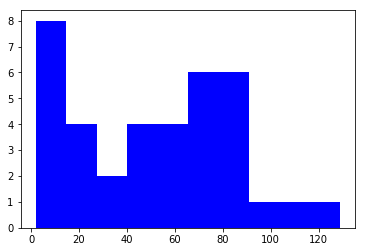

max:  129
min:  2
std:  34.27345430022585
mean:  51.32432432432432
median:  55


In [29]:
plt.hist(lowgames['turns'], color = 'b') #, bins = 50
plt.show()
print('max: ', max(lowgames['turns']))
print('min: ', min(lowgames['turns']))
print('std: ', stats.stdev(lowgames['turns']))
print('mean: ', stats.mean(lowgames['turns']))
print('median: ', stats.median(lowgames['turns']))

198


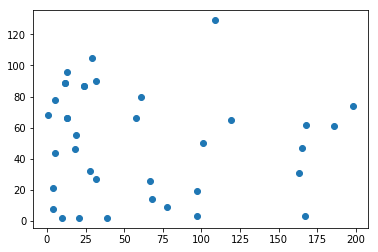

In [30]:
differences = np.absolute(np.asarray(lowgames['white_rating']) - np.asarray(lowgames['black_rating']))
print(max(differences))
plt.scatter(differences, lowgames['turns'])
plt.show()

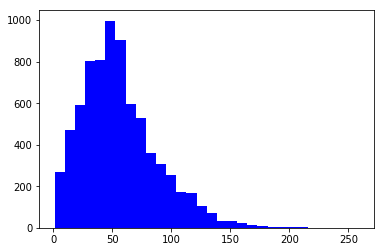

max:  259
min:  1
std:  32.039846693491384
mean:  55.667861885790174
median:  51.0


In [31]:
plt.hist(midlowgames['turns'], bins = 30, color = 'b') #, bins = 50
plt.show()
print('max: ', max(midlowgames['turns']))
print('min: ', min(midlowgames['turns']))
print('std: ', stats.stdev(midlowgames['turns']))
print('mean: ', stats.mean(midlowgames['turns']))
print('median: ', stats.median(midlowgames['turns']))

890


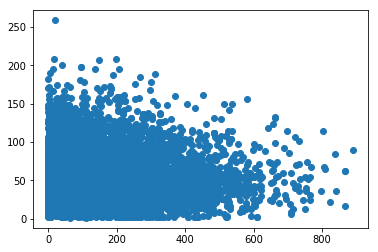

In [32]:
differences = np.absolute(np.asarray(midlowgames['white_rating']) - np.asarray(midlowgames['black_rating']))
print(max(differences))
plt.scatter(differences, midlowgames['turns'])
plt.show()

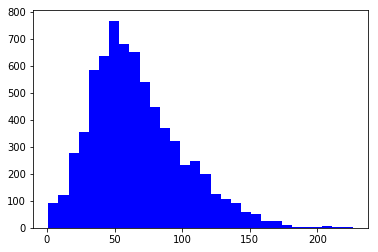

max:  226
min:  1
std:  33.803616160717425
mean:  66.32339156369834
median:  61


In [33]:
plt.hist(midhighgames['turns'], bins = 30, color = 'b') #, bins = 50
plt.show()
print('max: ', max(midhighgames['turns']))
print('min: ', min(midhighgames['turns']))
print('std: ', stats.stdev(midhighgames['turns']))
print('mean: ', stats.mean(midhighgames['turns']))
print('median: ', stats.median(midhighgames['turns']))

479


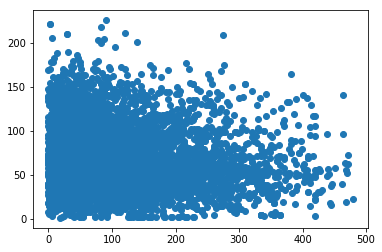

In [34]:
differences = np.absolute(np.asarray(midhighgames['white_rating']) - np.asarray(midhighgames['black_rating']))
print(max(differences))
plt.scatter(differences, midhighgames['turns'])
plt.show()

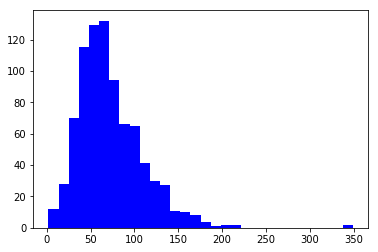

max:  349
min:  2
std:  37.80947119537826
mean:  72.8339222614841
median:  65


In [35]:
plt.hist(highgames['turns'], bins = 30, color = 'b') #, bins = 50
plt.show()
print('max: ', max(highgames['turns']))
print('min: ', min(highgames['turns']))
print('std: ', stats.stdev(highgames['turns']))
print('mean: ', stats.mean(highgames['turns']))
print('median: ', stats.median(highgames['turns']))

543


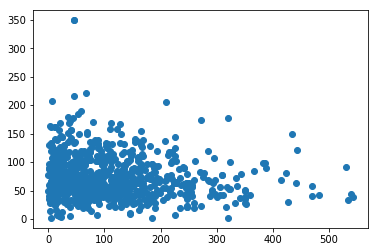

In [36]:
differences = np.absolute(np.asarray(highgames['white_rating']) - np.asarray(highgames['black_rating']))
print(max(differences))
plt.scatter(differences, highgames['turns'])
plt.show()

In [37]:
### frequent patterns between these groups?

In [38]:
## The opening ends when the tactics begin. https://www.chess.com/forum/view/general/how-many-moves-does-opening-moves-contain
### Most amateurs don't make ten good moves in a row. Focus on the first ten moves.


In [39]:
## should find how to detect blunders/errors

In [40]:
### openings

In [41]:
### may be able to determine this by doing 

In [42]:
def minmax_norm(data):
    
    max_count = max(data.values())
    min_count = min(data.values())
    
    print(max_count)
    print(min_count)
    
    ret_dict = {}
    for key in data:
        ret_dict[key] = (data[key] - min_count)/(max_count - min_count)
    return ret_dict

In [100]:
white_winners = lichess[lichess['winner'] == 'white']
black_winners = lichess[lichess['winner'] == 'black']
### openings for white players that win 
white_heights = {}
for i in white_winners['opening_core']:
    if i not in white_heights.keys():
        white_heights[i] = 1
    else:
        white_heights[i] += 1
#### openings for black players that win 
black_heights = {}
for i in black_winners['opening_core']:
    if i not in black_heights.keys():
        black_heights[i] = 1
    else:
        black_heights[i] += 1
        
white_heights_norm = minmax_norm(white_heights)    
black_heights_norm = minmax_norm(black_heights)

print('white max and min respectively: ')
print(max(white_heights_norm, key=white_heights_norm.get))
print(min(white_heights_norm, key=white_heights_norm.get), '\n\n')

print('black max and min respectively: ')
print(max(black_heights_norm, key=black_heights_norm.get))
print(min(black_heights_norm, key=black_heights_norm.get))

1173
1
1273
1
white max and min respectively: 
Sicilian Defense
Global Opening 


black max and min respectively: 
Sicilian Defense
Alekhine Defense #2


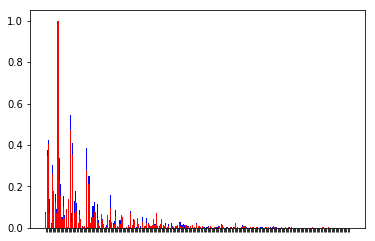

In [102]:
plt.figure()
plt.bar(white_heights_norm.keys(), white_heights_norm.values(), color='b')
plt.bar(black_heights_norm.keys(), black_heights_norm.values(), color='r')
plt.tick_params(labelbottom='off')

In [103]:
#list(set(x).difference(y))
ret_dict = {}
for key in list(set(white_heights.keys()).intersection(black_heights.keys())):
    if black_heights[key] == 0:
        black_heights[key] = 1
    ret_dict[key] = white_heights[key]/black_heights[key]

white_bars = {}
for key in list(set(white_heights.keys()).difference(black_heights.keys())):
    white_bars[key] = white_heights[key]

black_bars = {}
for key in list(set(black_heights.keys()).difference(white_heights.keys())):
    black_bars[key] = black_heights[key]

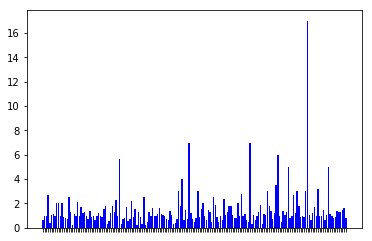

In [104]:
plt.figure()
plt.bar(ret_dict.keys(), ret_dict.values(), color='b')
plt.tick_params(labelbottom='off')

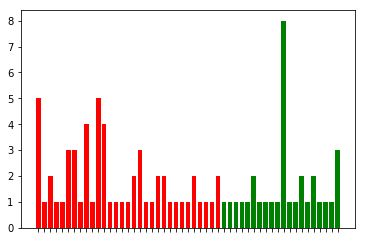

In [105]:
plt.figure()
plt.bar(white_bars.keys(), white_bars.values(), color='r')
plt.bar(black_bars.keys(), black_bars.values(), color='g')
plt.tick_params(labelbottom='off')

In [49]:
white_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] > 1]
black_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] < 1]

print(len(white_favor))
print(len(black_favor))

97
77


In [50]:
sorted_whites = sorted(white_heights.items(), key=lambda x: x[1])
sorted_blacks = sorted(black_heights.items(), key=lambda x: x[1])

print(sorted_whites[-6:-1])
print(sorted_blacks[-6:-1])

[("King's Pawn Game", 0.37457337883959047), ('Ruy Lopez', 0.3839590443686007), ('Italian Game', 0.4112627986348123), ("Queen's Pawn Game", 0.4232081911262799), ('French Defense', 0.5460750853242321)]
[("Petrov's Defense #3", 1), ('Wade Defense', 1), ('Catalan Opening', 1), ("King's Gambit |  Falkbeer Countergambit |  Staunton Line", 1), ("King's Gambit Declined |  Miles Defense", 1)]


In [51]:
###https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

In [ ]:
### sicilian defense is most common between the two, starts with the e4 pawn, without this value in both scenarios 
### we can see which openings that the colors tend to prefer

In [ ]:
### https://thomas-cokelaer.info/blog/2017/12/how-to-sort-a-dictionary-by-values-in-python/

In [ ]:
### openings don't seem to affect a players in general, maybe if we break this down from rank

In [52]:
white_winners = lowgames[lowgames['winner'] == 'white']
black_winners = lowgames[lowgames['winner'] == 'black']

print(white_winners.shape)
print(black_winners.shape)
white_heights = {}
for i in white_winners['opening_core']:
    if i not in white_heights.keys():
        white_heights[i] = 1
    else:
        white_heights[i] += 1
        
#white_heights = minmax_norm(white_heights)        
#### openings for black players that win 
black_heights = {}
for i in black_winners['opening_core']:
    if i not in black_heights.keys():
        black_heights[i] = 1
    else:
        black_heights[i] += 1

#black_heights = minmax_norm(black_heights)
print('white max and min respectively: ')
print(max(white_heights, key=white_heights.get))
print(min(white_heights, key=white_heights.get), '\n\n')

print('black max and min respectively: ')
print(max(black_heights, key=black_heights.get))
print(min(black_heights, key=black_heights.get))

(19, 10)
(18, 10)
white max and min respectively: 
King's Pawn Game
Van't Kruijs Opening 


black max and min respectively: 
King's Pawn Game
Nimzo-Larsen Attack


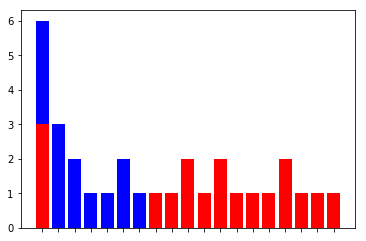

In [53]:
#plt.clf()
plt.figure()
plt.bar(white_heights.keys(), white_heights.values(), color='b')
plt.bar(black_heights.keys(), black_heights.values(), color='r')
plt.tick_params(labelbottom='off')

In [54]:
print(white_heights)
print(black_heights)

{"King's Pawn Game": 6, 'Scandinavian Defense': 3, "King's Knight Opening": 2, "Van't Kruijs Opening": 1, 'Russian Game': 1, 'Alekhine Defense': 2, 'Scotch Game': 1, 'Nimzowitsch Defense': 1, 'Englund Gambit': 1, "Queen's Pawn Game": 1}
{'Nimzo-Larsen Attack': 1, 'French Defense': 2, 'Sicilian Defense': 1, 'Blackmar-Diemer Gambit': 1, 'Italian Game': 1, "King's Pawn Game": 3, 'Kadas Opening': 2, "Petrov's Defense": 1, 'Nimzowitsch Defense': 1, 'Indian Game': 1, 'Englund Gambit': 1, "Queen's Gambit": 1, "Queen's Pawn Game": 2}


In [55]:
ret_dict = {}
for key in list(set(white_heights.keys()).intersection(black_heights.keys())):
    ret_dict[key] = white_heights[key]/black_heights[key]

white_bars = {}
for key in list(set(white_heights.keys()).difference(black_heights.keys())):
    white_bars[key] = white_heights[key]

black_bars = {}
for key in list(set(black_heights.keys()).difference(white_heights.keys())):
    black_bars[key] = black_heights[key]

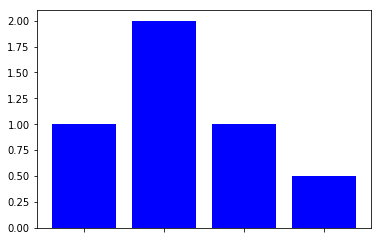

In [56]:
plt.figure()
plt.bar(ret_dict.keys(), ret_dict.values(), color='b')
plt.tick_params(labelbottom='off')

In [57]:
white_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] > 1]
black_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] < 1]

print(len(white_favor))
print(len(black_favor))

1
1


In [ ]:
### might suggest white has the advantage in naive player games

In [106]:
### openings for white players that win 
white_winners = midlowgames[midlowgames['winner'] == 'white']
black_winners = midlowgames[midlowgames['winner'] == 'black']

print(white_winners.shape)
print(black_winners.shape)
white_heights = {}
for i in white_winners['opening_core']:
    if i not in white_heights.keys():
        white_heights[i] = 1
    else:
        white_heights[i] += 1
black_heights = {}
for i in black_winners['opening_core']:
    if i not in black_heights.keys():
        black_heights[i] = 1
    else:
        black_heights[i] += 1
        
white_heights_norm = minmax_norm(white_heights)      
black_heights_norm = minmax_norm(black_heights) 

print('white max and min respectively: ')
print(max(white_heights_norm, key=white_heights_norm.get))
print(min(white_heights_norm, key=white_heights_norm.get), '\n\n')

print('black max and min respectively: ')
print(max(black_heights_norm, key=black_heights_norm.get))
print(min(black_heights_norm, key=black_heights_norm.get))

(3338, 10)
(3888, 10)
292
1
421
1
white max and min respectively: 
Sicilian Defense
Global Opening 


black max and min respectively: 
Sicilian Defense
Alekhine Defense #2


<Figure size 432x288 with 0 Axes>

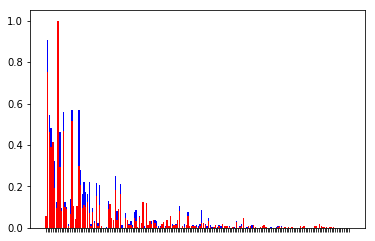

In [107]:
#### openings for black players that win 
plt.clf()
plt.figure()
plt.bar(white_heights_norm.keys(), white_heights_norm.values(), color='b')
plt.bar(black_heights_norm.keys(), black_heights_norm.values(), color='r')
plt.tick_params(labelbottom='off')

In [108]:
ret_dict = {}
for key in list(set(white_heights.keys()).intersection(black_heights.keys())):
    if black_heights[key] == 0:
        black_heights[key] = 1
    ret_dict[key] = white_heights[key]/black_heights[key]

white_bars = {}
for key in list(set(white_heights.keys()).difference(black_heights.keys())):
    white_bars[key] = white_heights[key]

black_bars = {}
for key in list(set(black_heights.keys()).difference(white_heights.keys())):
    black_bars[key] = black_heights[key]

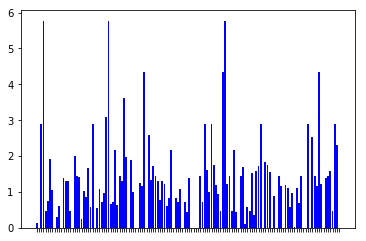

In [61]:
plt.figure()
plt.bar(ret_dict.keys(), ret_dict.values(), color='b')
plt.tick_params(labelbottom='off')

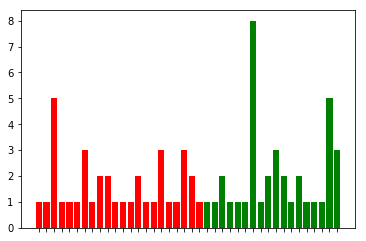

In [109]:
plt.figure()
plt.bar(white_bars.keys(), white_bars.values(), color='r')
plt.bar(black_bars.keys(), black_bars.values(), color='g')
plt.tick_params(labelbottom='off')

In [62]:
white_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] > 1]
black_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] < 1]

print(len(white_favor))
print(len(black_favor))

72
63


In [63]:
### openings for white players that win 

white_winners = midhighgames[midhighgames['winner'] == 'white']
black_winners = midhighgames[midhighgames['winner'] == 'black']

print(white_winners.shape)
print(black_winners.shape)
white_heights = {}
for i in white_winners['opening_core']:
    if i not in white_heights.keys():
        white_heights[i] = 1
    else:
        white_heights[i] += 1
black_heights = {}
for i in black_winners['opening_core']:
    if i not in black_heights.keys():
        black_heights[i] = 1
    else:
        black_heights[i] += 1
white_heights = minmax_norm(white_heights)        
black_heights = minmax_norm(black_heights) 

print('white max and min respectively: ')
print(max(white_heights, key=white_heights.get))
print(min(white_heights, key=white_heights.get), '\n\n')

print('black max and min respectively: ')
print(max(black_heights, key=black_heights.get))
print(min(black_heights, key=black_heights.get))

(3466, 10)
(3205, 10)
503
1
549
1
white max and min respectively: 
Sicilian Defense
Latvian Gambit Accepted 


black max and min respectively: 
Sicilian Defense
Paleface Attack


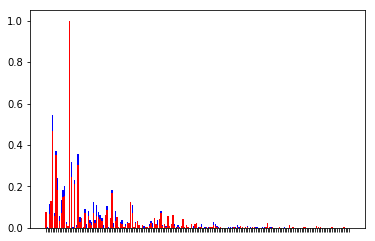

In [64]:
#### openings for black players that win 
#plt.clf()
plt.figure()
plt.bar(white_heights.keys(), white_heights.values(), color='b')
plt.bar(black_heights.keys(), black_heights.values(), color='r')
plt.tick_params(labelbottom='off')

In [65]:
ret_dict = {}
for key in list(set(white_heights.keys()).intersection(black_heights.keys())):
    if black_heights[key] == 0:
        black_heights[key] = 1
    ret_dict[key] = white_heights[key]/black_heights[key]

white_bars = {}
for key in list(set(white_heights.keys()).difference(black_heights.keys())):
    white_bars[key] = white_heights[key]

black_bars = {}
for key in list(set(black_heights.keys()).difference(white_heights.keys())):
    black_bars[key] = black_heights[key]

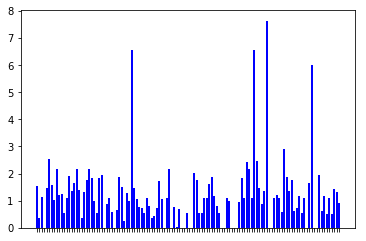

In [66]:
plt.figure()
plt.bar(ret_dict.keys(), ret_dict.values(), color='b')
plt.tick_params(labelbottom='off')

In [67]:
white_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] > 1]
black_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] < 1]

print(len(white_favor))
print(len(black_favor))

67
54


In [110]:
### openings for white players that win 
white_winners = highgames[highgames['winner'] == 'white']
black_winners = highgames[highgames['winner'] == 'black']

white_heights = {}
for i in white_winners['opening_core']:
    if i not in white_heights.keys():
        white_heights[i] = 1
    else:
        white_heights[i] += 1
black_heights = {}
for i in black_winners['opening_core']:
    if i not in black_heights.keys():
        black_heights[i] = 1
    else:
        black_heights[i] += 1
        
white_heights_norm = minmax_norm(white_heights)        
black_heights_norm = minmax_norm(black_heights)

print('white max and min respectively: ')
print(max(white_heights_norm, key=white_heights_norm.get))
print(min(white_heights_norm, key=white_heights_norm.get), '\n\n')

print('black max and min respectively: ')
print(max(black_heights_norm, key=black_heights_norm.get))
print(min(black_heights_norm, key=black_heights_norm.get))

(397, 10)
(371, 10)
85
1
69
1
white max and min respectively: 
Sicilian Defense
Petrov's Defense 


black max and min respectively: 
Sicilian Defense
Vienna Game #2


<Figure size 432x288 with 0 Axes>

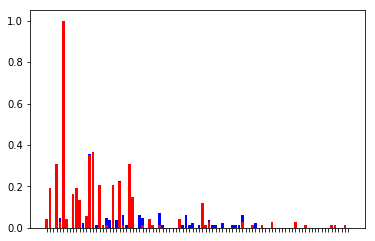

In [111]:
#### openings for black players that win 
plt.clf()
plt.figure()
plt.bar(white_heights_norm.keys(), white_heights_norm.values(), color='b')
plt.bar(black_heights_norm.keys(), black_heights_norm.values(), color='r')
plt.tick_params(labelbottom='off')

<Figure size 432x288 with 0 Axes>

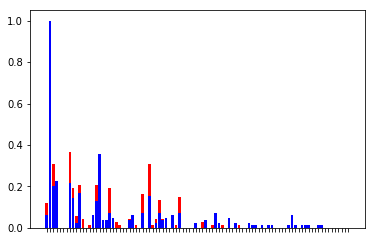

In [113]:
plt.clf()
plt.figure()
plt.bar(black_heights_norm.keys(), black_heights_norm.values(), color='r')
plt.bar(white_heights_norm.keys(), white_heights_norm.values(), color='b')
plt.tick_params(labelbottom='off')

In [114]:
ret_dict = {}
for key in list(set(white_heights.keys()).intersection(black_heights.keys())):
    if black_heights[key] == 0:
        black_heights[key] = 1
    ret_dict[key] = white_heights[key]/black_heights[key]

white_bars = {}
for key in list(set(white_heights.keys()).difference(black_heights.keys())):
    white_bars[key] = white_heights[key]

black_bars = {}
for key in list(set(black_heights.keys()).difference(white_heights.keys())):
    black_bars[key] = black_heights[key]

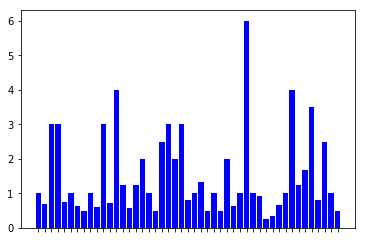

In [115]:
plt.figure()
plt.bar(ret_dict.keys(), ret_dict.values(), color='b')
plt.tick_params(labelbottom='off')

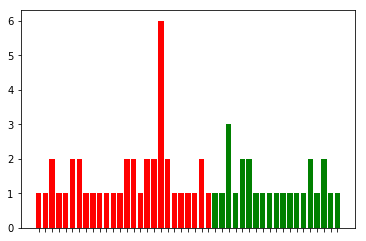

In [116]:
plt.figure()
plt.bar(white_bars.keys(), white_bars.values(), color='r')
plt.bar(black_bars.keys(), black_bars.values(), color='g')
plt.tick_params(labelbottom='off')

In [73]:
white_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] > 1]
black_favor = [i for i in range(len(list(ret_dict.values()))) if list(ret_dict.values())[i] < 1]

print(len(white_favor))
print(len(black_favor))

9
37


In [83]:
test1 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint1.ckpt')
test2 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint2.ckpt')
test3 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint3.ckpt')
test4 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint4.ckpt')
test5 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint5.ckpt')
test6 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint6.ckpt')
test7 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint7.ckpt')
test8 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint8.ckpt')
test9 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint9.ckpt')

test_tot = torch.cat([test1, test2, test3, test4, test5, test6, test7, test8, test9], dim=0)

In [124]:
avg_tensor = torch.zeros(test_tot.shape[0])
count = 0
for i in highgames['turns']:
    avg_tensor[count] = torch.mean(test_tot[count][:i])
    count += 1

In [135]:
count = 0

white_errors = torch.zeros((test_tot.shape[0], 175))
black_errors = torch.zeros((test_tot.shape[0], 174))

for i in test_tot:
    
    white_errors[count] = i[::2]
    black_errors[count] = i[1::2]
    count += 1

(array([  1.,   2.,   0.,   4.,   3.,   7.,  11.,  21.,  35., 100., 419.,
        144.,  47.,  23.,  15.,   8.,   4.,   4.,   0.,   1.]),
 array([-166.63492   , -148.06447   , -129.494     , -110.92355   ,
         -92.353096  ,  -73.78264   ,  -55.21218   ,  -36.641727  ,
         -18.07127   ,    0.49918517,   19.069641  ,   37.6401    ,
          56.210552  ,   74.781006  ,   93.35146   ,  111.92192   ,
         130.49237   ,  149.06284   ,  167.63329   ,  186.20375   ,
         204.7742    ], dtype=float32),
 <a list of 20 Patch objects>)

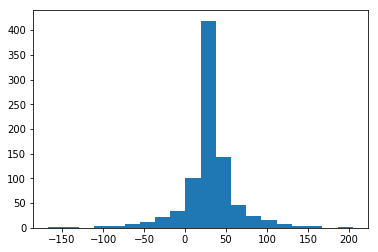

In [125]:
plt.hist(avg_tensor, bins = 20)

In [136]:
avg_white_tensor = torch.zeros(test_tot.shape[0])
count = 0
for i in highgames['turns']:
    if i%2 == 1:
        white_turns = i//2 + 1
    else:
        white_turns = i//2
    avg_white_tensor[count] = torch.mean(white_errors[count][:white_turns])
    count += 1

(array([  2.,   4.,   3.,  11.,  15.,  16.,  30.,  64., 143., 247., 141.,
         70.,  40.,  18.,  14.,  11.,   9.,  10.,   0.,   1.]),
 array([-1489.5658 , -1333.573  , -1177.5801 , -1021.5873 ,  -865.5945 ,
         -709.6016 ,  -553.60876,  -397.61597,  -241.62312,   -85.63029,
           70.36255,   226.35538,   382.3482 ,   538.34106,   694.33386,
          850.3267 ,  1006.3196 ,  1162.3124 ,  1318.3052 ,  1474.2981 ,
         1630.2909 ], dtype=float32),
 <a list of 20 Patch objects>)

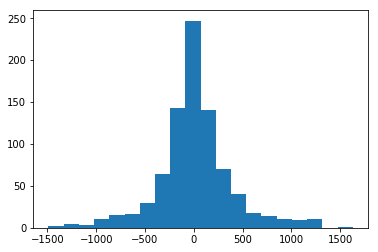

In [137]:
plt.hist(avg_white_tensor, bins = 20)

In [133]:
avg_black_tensor = torch.zeros(test_tot.shape[0])
count = 0
for i in highgames['turns']:
    black_turns = i//2
    avg_black_tensor[count] = torch.mean(black_errors[count][:black_turns])
    count += 1

(array([  1.,   1.,   8.,  11.,  10.,  17.,  32.,  32.,  82., 194., 227.,
        117.,  45.,  28.,  20.,  13.,   4.,   0.,   6.,   1.]),
 array([-1567.8545  , -1407.5131  , -1247.1718  , -1086.8303  ,
         -926.4889  ,  -766.1475  ,  -605.80615 ,  -445.46472 ,
         -285.12335 ,  -124.781944,    35.55945 ,   195.90085 ,
          356.24225 ,   516.5836  ,   676.92505 ,   837.2664  ,
          997.6078  ,  1157.9492  ,  1318.2906  ,  1478.632   ,
         1638.9734  ], dtype=float32),
 <a list of 20 Patch objects>)

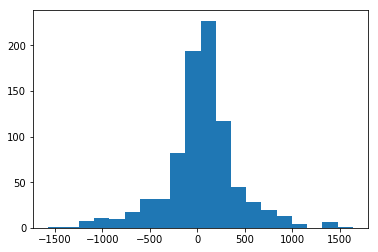

In [138]:
plt.hist(avg_black_tensor, bins = 20)

In [139]:
opening_errors = torch.zeros((test_tot.shape[0], max(highgames['opening_ply'])))
count = 0
for i in highgames['opening_ply']:
    opening_errors[count][:i] = test_tot[count][:i]
    count += 1

In [142]:
count = 0
white_opening_errors = torch.zeros((test_tot.shape[0], max(highgames['opening_ply'])//2 + 1))
for i in highgames['opening_ply']:
    if i%2 == 1:
        white_turns = i//2 + 1
    else:
        white_turns = i//2
    
    white_opening_errors[count][:white_turns] = white_errors[count][:white_turns]
    count += 1

In [143]:
white_opening_errors

tensor([[ 15., -20.,  13.,  ...,   0.,   0.,   0.],
        [ 15.,  35.,  91.,  ...,   0.,   0.,   0.],
        [ 15.,  -3.,  23.,  ...,   0.,   0.,   0.],
        ...,
        [-18., -33.,   3.,  ...,   0.,   0.,   0.],
        [ 15.,   0.,   0.,  ...,   0.,   0.,   0.],
        [ 15., -20.,  11.,  ...,   0.,   0.,   0.]])

In [144]:
count = 0
black_opening_errors = torch.zeros((test_tot.shape[0], max(highgames['opening_ply'])//2))
for i in highgames['opening_ply']:
    black_turns = i//2
    
    black_opening_errors[count][:black_turns] = black_errors[count][:black_turns]
    count += 1

In [145]:
black_opening_errors

tensor([[ 84., 101.,  44.,  ...,   0.,   0.,   0.],
        [ 39.,   5.,  44.,  ...,   0.,   0.,   0.],
        [ 39.,  41.,  38.,  ...,   0.,   0.,   0.],
        ...,
        [ 65.,  58.,  64.,  ...,   0.,   0.,   0.],
        [106.,   0.,   0.,  ...,   0.,   0.,   0.],
        [ 84., 101.,  44.,  ...,   0.,   0.,   0.]])

(array([159., 206., 153., 175.,  68.,  36.,  42.,   7.,   2.,   1.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

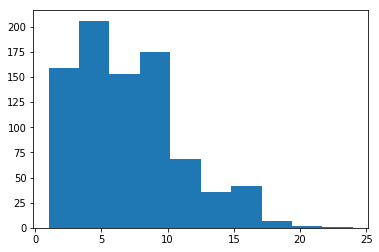

In [146]:
plt.hist(highgames['opening_ply'])

In [148]:
highgames['index'] = range(0, highgames.shape[0])

turns
victory_status
winner
white_rating
black_rating
moves
opening_name
opening_ply
opening_moves
opening_core
index


,turns,victory_status,winner,white_rating,black_rating,moves,opening_name,opening_ply,opening_moves,opening_core,index
636,86,resign,black,2306,2405,e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5 Nxe5 d4 Nc6 d5 Bb4 ...,Four Knights Game: Halloween Gambit,7,e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5,Four Knights Game,0
637,58,resign,black,2422,2386,e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 exd6 Qxd6 ...,Sicilian Defense: Alapin Variation | Smith-Mo...,8,e4 c5 d4 cxd4 c3 Nf6 e5 Nd5,Sicilian Defense,1
638,50,resign,black,2373,2356,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 ...,Sicilian Defense: Lasker-Pelikan Variation | ...,17,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 ...,Sicilian Defense,2
639,62,resign,black,2325,2338,d4 Nf6 Nf3 d5 g3 Bf5 Bg2 e6 O-O Be7 c4 c6 Nc3 ...,Queen's Pawn Game: Symmetrical Variation | Ps...,5,d4 Nf6 Nf3 d5 g3,Queen's Pawn Game,3
642,43,resign,white,2329,2017,d4 Nf6 c4 c5 d5 e6 Nc3 exd5 cxd5 d6 e4 g6 f4 B...,Benoni Defense: Taimanov Variation,15,d4 Nf6 c4 c5 d5 e6 Nc3 exd5 cxd5 d6 e4 g6 f4 B...,Benoni Defense,4


In [158]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(test_tot)
labels = kmeans.labels_

In [159]:
for i in range(highgames.shape[0]):
    if labels[i] == 0:
        print(test_tot[i])

tensor([  -18.,    71.,   -12.,    93.,   -44.,    90.,   -41.,    85.,   -28.,
           87.,   -55.,    70.,   -73.,   130.,   -58.,   124.,   -40.,   118.,
          -66.,   146.,   -69.,   160.,     7.,    20.,     0.,   199.,   290.,
         -305.,   370.,   258.,   -11.,  1092., -1015.,  1213., -1287.,  1348.,
         -785.,   879.,  -849.,   869.,  -894.,   925.,  -936.,   932.,  -961.,
          974., -1081.,  1165., -1164.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 1.5000e+01,  3.9000e+01, -3.0000e+00,  4.1000e+01,  0.0000e+00,
         3.8000e+01,  3.2000e+01,  3.7000e+01,  3.3000e+01,  1.2700e+02,
         0.0000e+00,  1.0800e+02, -4.0000e+01,  1.8400e+02, -1.2000e+02,
         1.9000e+02, -1.3600e+02,  1.9600e+02, -1.0400e+02,  1.8200e+02,
        -1.3800e+02,  2.8100e+02, -2.1600e+02,  2.6400e+02, -2.1000e+02,
         2.4400e+02, -2.1600e+02,  2.4600e+02, -2.3300e+02,  3.8700e+02,
        -3.2800e+02,  3.6600e+02, -3.1500e+02,  5.1600e+02, -4.7100e+02,
         7.5300e+02, -8.0500e+02,  1.3130e+03, -1.2660e+03,  1.3250e+03,
        -1.2960e+03,  1.4840e+03, -1.4960e+03,  1.9530e+03, -2.1310e+03,
         2.1750e+03, -2.5060e+03,  4.1190e+03, -9.0000e+00,  9.0000e+00,
        -8.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 1.5000e+01,  3.9000e+01, -3.0000e+00,  5.6000e+01,  2.7000e+01,
         5.1000e+01,  1.9000e+01,  4.0000e+01,  2.9000e+01,  4.1000e+01,
         4.8000e+01,  5.8000e+01,  6.6000e+01,  9.8000e+01,  8.2000e+01,
        -1.6000e+01,  1.3800e+02, -4.9000e+01,  1.2300e+02,  4.6000e+01,
         2.2000e+01,  4.1000e+01,  2.0000e+01,  1.0000e+01,  2.3000e+01,
         7.0000e+00,  4.3000e+01,  1.2100e+02, -5.7000e+01,  4.4200e+02,
        -2.3800e+02,  5.4800e+02, -9.9000e+01,  2.0500e+02, -1.8000e+02,
         3.8100e+02, -1.6400e+02,  3.0400e+02, -1.0500e+02,  3.3300e+02,
        -1.8000e+02,  3.7300e+02, -2.7500e+02,  5.2600e+02, -4.8300e+02,
         1.4340e+03, -1.3850e+03,  1.4780e+03, -1.4780e+03,  3.9200e+03,
        -1.2690e+03,  1.8370e+03, -1.6120e+03,  1.9890e+03, -1.8850e+03,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  15.,   84.,  -20.,  187.,  -79.,  232., -171.,  209.,  -93.,  143.,
          40.,   49.,    3.,  148., -113.,  210., -123.,  209.,  -83.,  271.,
        -231.,  312., -214.,  233., -229.,  266., -200.,  493., -497.,  601.,
        -486.,  541., -484.,  530., -461.,  466., -485.,  509., -372.,  391.,
        -289.,  318., -323.,  360., -352.,  434., -330.,  404., -365.,  690.,
        -465.,  470., -482.,  495., -455.,  498., -441.,  484., -467.,  471.,
        -466.,  491., -461.,  479., -469.,  496., -472.,  505., -504.,  561.,
        -539.,  624., -496.,  532.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
   

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 1.5000e+01,  5.8000e+01,  9.0000e+00,  4.6000e+01,  0.0000e+00,
         4.7000e+01,  1.0000e+01,  3.6000e+01,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  2.0000e+01,  0.0000e+00,  5.2000e+01, -6.0000e+00,
         5.1000e+01,  5.9000e+01,  7.1000e+01,  0.0000e+00,  8.4000e+01,
         2.0000e+00,  4.0000e+01,  1.3000e+01,  8.3000e+01, -3.0000e+01,
         7.3000e+01, -1.2000e+01,  6.1000e+01, -3.2000e+01,  5.7000e+01,
        -2.3000e+01,  6.2000e+01, -4.0000e+00,  5.2000e+01, -2.7000e+01,
         4.1000e+01, -4.0000e+00,  4.6000e+01, -2.6000e+01,  6.2000e+01,
        -4.6000e+01,  1.6100e+02, -1.0600e+02,  1.1600e+02, -8.5000e+01,
         1.4600e+02, -9.0000e+01,  1.7200e+02, -1.4600e+02,  1.5600e+02,
        -1.3000e+02,  1.5500e+02, -1.4700e+02,  4.5600e+02, -4.6800e+02,
         5.8400e+02, -5.8000e+02,  7.0000e+02, -7.1100e+02,  1.0070e+03,
        -1.0570e+03,  1.7160e+03, -5.6310e+03,  0.0000e+00,  0.

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ 1.5000e+01,  3.9000e+01, -3.0000e+00,  4.1000e+01,  2.3000e+01,
         3.8000e+01,  2.5000e+01,  4.4000e+01, -2.0000e+00,  1.1900e+02,
        -4.2000e+01,  1.1300e+02, -1.7000e+01,  9.1000e+01,  1.8000e+01,
         5.9000e+01,  3.0000e+01,  5.4000e+01,  4.0000e+00,  4.6000e+01,
         1.0000e+00,  8.9000e+01,  5.9000e+01,  9.5000e+01, -1.8000e+01,
         1.6300e+02, -1.2400e+02,  1.8700e+02, -1.4200e+02,  1.9000e+02,
        -9.1000e+01,  9.0000e+01, -4.8000e+01,  2.6500e+02, -2.6700e+02,
         2.9200e+02, -2.4300e+02,  2.9200e+02, -2.4600e+02,  3.1100e+02,
        -2.6900e+02,  3.1500e+02, -1.9700e+02,  6.9100e+02, -6.6800e+02,
         6.9900e+02, -6.9800e+02,  7.1700e+02, -7.3000e+02,  7.4100e+02,
        -7.3100e+02,  7.4100e+02, -3.7600e+02,  7.8200e+02, -1.7100e+02,
         2.2100e+02, -1.3200e+02,  2.4200e+02, -1.9000e+02,  2.0900e+02,
        -1.4600e+02,  1.6700e+02, -1.3200e+02,  2.2600e+02,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 4.0000e+01,  6.0000e+01,  1.6000e+01,  3.2000e+01,  8.0000e+00,
         4.6000e+01,  5.2000e+01,  4.7000e+01,  4.4000e+01,  5.6000e+01,
         3.0000e+00,  4.6000e+01,  0.0000e+00,  5.1000e+01,  1.9000e+01,
         2.7000e+01,  4.2000e+01,  4.2000e+01,  5.1000e+01,  6.3000e+01,
        -2.5000e+01,  1.0000e+02, -2.3000e+01,  1.0300e+02, -1.3000e+01,
         6.4000e+01, -2.9000e+01,  1.0700e+02, -2.0000e+01,  9.2000e+01,
         0.0000e+00,  7.9000e+01, -5.3000e+01,  7.0000e+01,  0.0000e+00,
         2.5100e+02, -1.9400e+02,  2.6800e+02, -2.4500e+02,  2.5800e+02,
        -2.9200e+02,  3.4100e+02, -3.6400e+02,  4.6200e+02, -2.2700e+02,
         3.9300e+02, -3.2600e+02,  7.6100e+02, -7.5700e+02,  9.1900e+02,
        -8.5400e+02,  1.1030e+03, -1.1200e+03,  1.3970e+03, -8.6400e+02,
         1.5210e+03, -1.6300e+03,  1.7300e+03, -1.8260e+03,  1.8360e+03,
        -1.3850e+03,  1.4500e+03, -1.4620e+03,  1.8670e+03, -1.

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ 1.5000e+01,  1.0500e+02, -5.8000e+01,  1.1200e+02, -6.9000e+01,
         1.1600e+02, -6.4000e+01,  1.2600e+02, -5.3000e+01,  1.1400e+02,
        -7.0000e+00,  5.9000e+01, -3.8000e+01,  1.1300e+02, -6.8000e+01,
         1.0400e+02, -5.4000e+01,  1.0900e+02, -5.6000e+01,  8.4000e+01,
        -4.6000e+01,  9.0000e+01, -5.1000e+01,  8.8000e+01, -1.8000e+01,
         7.2000e+01, -1.8000e+01,  6.6000e+01,  4.1000e+01, -1.1000e+01,
         3.9000e+01, -1.0000e+01,  3.0000e+00,  6.3000e+01,  0.0000e+00,
         2.6900e+02, -2.3500e+02,  5.9600e+02, -5.7400e+02,  8.0100e+02,
        -7.9600e+02,  1.1480e+03, -1.1240e+03,  1.4630e+03, -1.4820e+03,
         1.5500e+03, -1.5450e+03,  1.5480e+03, -1.5030e+03,  2.0370e+03,
        -5.8310e+03,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([-1.8000e+01,  6.5000e+01, -1.1000e+01,  1.0100e+02,  1.9000e+01,
         3.7000e+01,  3.6000e+01,  2.8000e+01,  3.2000e+01,  1.9000e+01,
         4.6000e+01, -4.0000e+00,  4.5000e+01,  9.2000e+01,  4.3000e+01,
         5.0000e+01,  3.3000e+01,  3.9000e+01,  5.3000e+01,  4.3000e+01,
         7.6000e+01,  2.4000e+01,  6.3000e+01,  4.4000e+01, -2.1000e+01,
         1.0500e+02, -5.4000e+01,  9.5000e+01,  3.5000e+01,  4.0000e+01,
         0.0000e+00,  1.1500e+02,  0.0000e+00,  3.9100e+02,  0.0000e+00,
         7.0000e+00,  0.0000e+00,  5.5000e+01, -3.8000e+01,  1.0700e+02,
        -7.8000e+01,  1.1500e+02, -8.2000e+01,  1.9400e+02,  5.0000e+01,
         0.0000e+00,  5.4000e+01,  0.0000e+00,  9.4000e+01,  8.0000e+02,
        -9.3200e+02,  1.0080e+03, -9.7900e+02,  2.0880e+03, -2.2440e+03,
         2.3510e+03, -2.3920e+03,  8.2800e+03, -9.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([-1.8000e+01,  6.5000e+01, -1.1000e+01,  8.5000e+01,  3.0000e+01,
         2.8000e+01,  3.6000e+01,  1.1000e+01,  2.0000e+01,  1.6000e+01,
         5.1000e+01,  2.9000e+01,  3.5000e+01,  5.0000e+01,  0.0000e+00,
         8.7000e+01,  0.0000e+00,  7.2000e+01, -7.0000e+00,  7.5000e+01,
         1.7300e+02,  1.3000e+01,  9.8000e+01,  7.0000e+00,  8.5000e+01,
        -4.1000e+01,  1.8800e+02, -1.3700e+02,  3.6700e+02, -2.3000e+01,
         2.6700e+02, -2.2600e+02,  2.6500e+02, -1.7000e+01,  0.0000e+00,
         1.2700e+02,  1.5200e+02, -1.0100e+02,  1.3000e+02, -1.2000e+02,
         1.8300e+02,  0.0000e+00,  5.7000e+01,  7.9000e+01,  3.2100e+02,
         6.5700e+02, -6.5400e+02,  1.2150e+03, -1.2590e+03,  1.3960e+03,
        -1.8640e+03,  2.0910e+03, -2.1340e+03,  2.2910e+03, -1.3400e+03,
         5.5400e+03, -1.3730e+03,  5.7360e+03, -5.7360e+03,  5.7430e+03,
        -5.6450e+03,  5.6500e+03, -5.6500e+03,  5.6500e+03, -1.

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([-1.8000e+01,  6.5000e+01, -3.3000e+01,  1.1900e+02,  6.0000e+01,
         8.2000e+01,  1.0000e+00,  6.1000e+01,  4.0000e+01,  0.0000e+00,
         4.9000e+01,  2.7000e+01,  4.4000e+01,  4.7000e+01,  4.0000e+00,
         3.2000e+01,  2.6000e+01,  7.4000e+01,  3.6000e+01,  1.5000e+01,
         5.4000e+01,  4.7400e+02, -4.5600e+02,  4.8800e+02, -4.8100e+02,
         5.4900e+02, -4.6500e+02,  5.0700e+02, -4.8600e+02,  4.7800e+02,
        -4.7100e+02,  5.2500e+02, -4.9600e+02,  5.7600e+02, -5.3900e+02,
         5.5800e+02, -4.9600e+02,  6.0700e+02, -4.7300e+02,  5.6300e+02,
        -5.2600e+02,  5.6900e+02, -5.5900e+02,  5.8400e+02, -5.5400e+02,
         6.0600e+02, -5.6600e+02,  6.3500e+02, -5.7300e+02,  6.8600e+02,
        -6.0400e+02,  9.6600e+02, -7.4300e+02,  1.3280e+03, -7.6900e+02,
         1.5390e+03, -8.1700e+02,  8.3400e+02, -2.6500e+02,  3.3200e+02,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  3.4700e+02,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  -18.,    73.,   -26.,    56.,    13.,    74.,     7.,    77.,   -24.,
           80.,   -10.,    87.,   -36.,    62.,     0.,    85.,     0.,   107.,
          -42.,   105.,    -6.,   212.,  -184.,   259.,  -204.,   546.,  -530.,
          615.,  -585.,   641.,  -599.,   813.,  -710.,   786.,  -781.,   802.,
         -787.,   904.,  -867.,  1121., -1121.,  1548., -1709.,  1816., -1879.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  15.,   39.,   -3.,   41.,    0.,   38.,   26.,   41.,   -2.,   48.,
          56.,   40.,   26.,   77.,  -37.,   85.,  -24.,   64.,  -44.,   77.,
         -23.,   83.,    0.,  103.,  -23.,   86.,  -27.,  107.,  -79.,   97.,
         -46.,  115.,  -84.,  175., -148.,  183., -177.,  199., -145.,  172.,
        -176.,  249., -273.,  318., -279.,  280., -242.,  266., -270.,  355.,
        -337.,  478., -481.,  531., -557.,  741., -477.,  505., -482.,  511.,
        -479.,  521., -492.,  568., -414.,  572., -470.,  491., -370.,  818.,
        -360.,  419., -366.,  370., -334.,  499., -426.,  506., -498.,  634.,
        -458.,  561., -453.,  560., -476.,  484., -323.,  319.,   31.,  -21.,
          40.,  -23.,   39.,  -28.,   93.,  -87.,   68.,  -77.,  180.,  -13.,
          13.,    0.,   13.,    0.,    0.,   -7.,    2.,    0.,    6.,    0.,
           0.,    0.,   35.,    0.,   79.,    0.,    0.,    0.,    0.,    0.,
   

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([  15.,   39.,   -3.,   41.,   23.,   38.,   25.,   14.,   17.,   37.,
          35.,   73.,    3.,   46.,   26.,   -2.,   84.,   42.,   29.,   32.,
          13.,   52.,  110.,   57.,  -13.,  124.,  -75.,  163., -147.,  396.,
        -356.,  509., -438.,  529., -507.,  858., -857.,  861., -865.,  853.,
        -811.,  888., -866.,  893., -872., 1050., -959., 1463., -793.,  836.,
        -824.,  849., -846.,  877., -871.,  893., -871.,  898., -877.,  909.,
        -896.,  926., -916.,  942., -924.,  956., -798.,  796., -845.,  866.,
        -851.,  844., -886., 1390., -819.,  931., -941.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([   15.,    58.,    11.,    67.,    53.,    85.,    67.,    63.,    31.,
           97.,   -12.,    70.,    45.,     0.,    77.,    87.,   155.,    66.,
           60.,    89.,   -62.,   144.,  -125.,    59.,   -48.,   246.,  -272.,
         1142., -1137.,  1146.,  -538.,   600.,  -436.,   735.,  -725.,   769.,
         -773.,   823.,  -825.,  1100.,  -749.,   995.,  -858.,  1188., -1198.,
         1261., -1376.,  1435.,  -581.,   841.,  -549.,   591.,  -543.,  1502.,
        -1071.,  1127.,  -637.,  1347.,  -588.,  1738., -1347.,  2417., -1367.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([-1.8000e+01,  7.1000e+01, -1.2000e+01,  9.3000e+01, -1.7000e+01,
         7.6000e+01, -1.3000e+01,  5.8000e+01, -1.0000e+00,  1.0600e+02,
         1.2000e+01,  8.3000e+01,  7.0000e+00,  7.5000e+01,  9.2000e+01,
        -2.1000e+01,  9.4000e+01,  3.8000e+01,  9.8000e+01,  2.7000e+01,
         3.6000e+01,  8.1000e+01,  1.2000e+01,  4.3000e+01, -2.1000e+01,
         1.2100e+02,  2.1000e+01,  9.8000e+01, -2.3000e+01,  2.0000e+02,
        -1.4600e+02,  2.7300e+02, -1.7200e+02,  2.3600e+02, -2.0000e+02,
         1.8900e+02, -1.8400e+02,  5.8200e+02, -5.7500e+02,  8.8300e+02,
        -8.7000e+02,  8.8500e+02, -8.7300e+02,  9.9900e+02, -9.5700e+02,
         9.5200e+02, -8.5900e+02,  8.4400e+02, -8.5200e+02,  8.9300e+02,
        -7.9000e+02,  9.1600e+02, -8.8500e+02,  1.7920e+03, -1.6980e+03,
         1.7520e+03, -2.1510e+03,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ 1.5000e+01,  5.8000e+01, -7.0000e+00,  6.6000e+01,  3.7000e+01,
         4.5000e+01,  3.4000e+01,  3.8000e+01,  3.6000e+01,  1.4600e+02,
        -8.2000e+01,  9.2000e+01, -6.1000e+01,  1.1400e+02, -2.2000e+01,
         2.1000e+02, -1.7300e+02,  1.8400e+02, -1.2800e+02,  2.0200e+02,
        -1.7400e+02,  2.6900e+02, -3.2700e+02,  4.8600e+02, -4.7700e+02,
         5.7400e+02, -5.2500e+02,  6.8800e+02, -6.8600e+02,  6.8600e+02,
        -7.1800e+02,  7.8700e+02, -7.2200e+02,  8.5600e+02, -8.4800e+02,
         8.4600e+02, -9.3000e+02,  9.7700e+02, -9.6400e+02,  9.8700e+02,
        -9.6000e+02,  1.0230e+03, -1.0700e+03,  1.1290e+03, -1.1600e+03,
         1.2280e+03, -1.2690e+03,  1.3030e+03, -1.2990e+03,  7.4150e+03,
        -7.4150e+03,  2.0000e+00, -1.0000e+00,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ -18.,   65.,   32.,   43.,   42.,   31.,   29.,   38.,   14.,   53.,
          37.,   33.,   18.,   64.,   37.,   84.,  -51.,  113.,  -19.,  121.,
         -61.,  136.,  -80.,  216.,  -23.,  122.,  -41.,  117.,  -92.,  131.,
         -85.,  115.,  -67.,  187., -151.,  250.,  -80.,  229., -101.,  412.,
        -382.,  394., -353.,  379., -378.,  451., -431.,  446., -428.,  467.,
        -459.,  526., -238.,  260., -134.,  172., -167.,  560., -515.,  720.,
        -636.,  712., -569.,  665., -644.,  706., -619.,  661., -658.,  670.,
        -663.,  670., -638.,  684., -672.,  727., -717.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,

           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])
tensor([-1.8000e+01,  6.5000e+01, -3.3000e+01,  1.2400e+02, -5.0000e+01,
         9.8000e+01, -4.2000e+01,  9.0000e+01,  7.0000e+00,  6.1000e+01,
         0.0000e+00,  6.4000e+01,  4.4000e+01,  1.0100e+02, -2.1000e+01,
         1.0000e+02, -1.0000e+00,  1.0700e+02, -5.0000e+01,  2.3600e+02,
        -4.5000e+01,  1.7300e+02, -8.5000e+01,  1.6200e+02,  3.0000e+01,
        -5.0000e+00,  1.0600e+02, -3.9000e+01,  8.0000e+01, -7.6000e+01,
         1.4900e+02, -6.2000e+01,  1.6000e+02, -5.7000e+01,  1.3900e+02,
        -9.8000e+01,  1.4800e+02, -6.1000e+01,  2.3500e+02, -2.0000e+01,
         1.5200e+02, -1.0600e+02,  1.4400e+02, -1.8800e+02,  1.5300e+02,
        -6.0000e+01,  1.3300e+02,  2.4200e+02,  1.8100e+02,  1.7900e+02,
        -1.2800e+02,  6.0400e+02, -5.5500e+02,  6.4900e+02, -3.9700e+02,
         4.5700e+02, -3.2800e+02,  5.5100e+02, -3.9300e+02,  4.5000e+02,
        -3.4500e+02,  3.9100e+02, -3.0100e+02,  7.99

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([-1.8000e+01,  7.3000e+01, -8.0000e+00,  8.2000e+01, -1.1000e+01,
         6.9000e+01, -8.0000e+00,  8.0000e+01, -1.5000e+01,  1.1300e+02,
         1.2000e+01,  4.1000e+01,  3.0000e+00,  6.5000e+01,  1.7000e+01,
         2.6000e+01,  3.0000e+01,  6.8000e+01, -1.0000e+01,  5.3000e+01,
        -2.1000e+01,  8.0000e+01, -1.5000e+01,  6.9000e+01,  0.0000e+00,
         5.8000e+01,  4.4000e+01,  6.9000e+01, -1.5000e+01,  1.1400e+02,
         1.2000e+01,  3.9000e+01,  3.9000e+01,  4.8000e+01,  1.4000e+01,
         1.9000e+01,  4.6000e+01,  1.1000e+01,  6.9000e+01,  2.2700e+02,
        -8.6000e+01,  8.0000e+01,  3.0000e+01, -4.4000e+01,  6.4000e+02,
         0.0000e+00,  5.7000e+01,  5.8700e+02, -6.9300e+02,  8.1200e+02,
        -5.4200e+02,  9.1500e+02, -6.9000e+02,  1.0730e+03, -1.2580e+03,
         1.7210e+03, -1.0090e+03,  2.3260e+03, -6.1280e+03,  6.1280e+03,
        -1.3300e+03,  1.4050e+03, -6.0230e+03,  6.0230e+03, -1.

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([  15.,  105.,  -58.,  112.,  -69.,  100.,  -27.,   96.,  -31.,   87.,
         -40.,   90.,   -5.,   74.,   15.,   95.,   -9.,   32.,  -23.,   59.,
          -7.,   57.,    0.,   46.,    0.,   75.,  -34.,   75.,  -29.,  134.,
         -85.,  135.,  -84.,  153.,  -98.,  209.,  -97.,  165.,  -93.,  175.,
        -109.,  142.,  -92.,  150.,  -76.,  185., -122.,  206., -134.,  164.,
        -115.,  282., -207.,  351., -173.,  276., -153.,  156.,  287.,   69.,
         353.,  144.,  -53.,  648., -674.,  746., -721.,  735., -736.,  755.,
        -683.,  884., -915.,  991., -732.,  808., -749.,    3.,   -2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ 1.5000e+01,  8.4000e+01, -2.0000e+01,  1.0100e+02,  1.3000e+01,
         4.4000e+01,  2.3000e+01,  6.0000e+01, -6.0000e+00,  6.4000e+01,
        -5.0000e+00,  5.0000e+01,  3.8000e+01,  6.9000e+01, -2.9000e+01,
         8.4000e+01, -2.1000e+01,  8.1000e+01, -4.9000e+01,  6.6000e+01,
        -4.0000e+00,  3.5000e+01, -3.4000e+01,  3.6000e+02, -3.1100e+02,
         3.6400e+02, -3.4800e+02,  4.3200e+02, -4.0300e+02,  4.3000e+02,
        -4.0600e+02,  4.4600e+02, -3.5800e+02,  4.2100e+02, -4.1600e+02,
         4.0600e+02, -3.4200e+02,  3.6700e+02, -3.6300e+02,  3.6700e+02,
        -3.5600e+02,  3.9400e+02, -3.8600e+02,  4.7300e+02, -3.6900e+02,
         4.2000e+02, -4.1000e+02,  4.9100e+02, -4.4000e+02,  5.3000e+02,
        -5.1300e+02,  5.2100e+02, -4.6300e+02,  5.2200e+02, -5.3800e+02,
         5.5000e+02, -5.2200e+02,  7.3900e+02, -7.1300e+02,  7.1900e+02,
        -5.3800e+02,  6.0000e+02, -4.3600e+02,  4.7100e+02,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([    8.,    75.,    47.,    27.,    63.,    58.,     5.,    68.,     3.,
           46.,   -13.,    66.,     8.,    87.,   -48.,   119.,   -42.,   119.,
          -29.,   119.,   -55.,   183.,  -112.,   147.,   -85.,   127.,   -44.,
          119.,   -82.,   132.,   -98.,   125.,   -59.,   168.,   -77.,   216.,
         -179.,   208.,  -134.,   180.,  -185.,   232.,  -205.,   259.,  -161.,
          313.,  -249.,   366.,  -323.,   348.,  -358.,   834.,  -822.,  1307.,
        -1354.,  1439., -2377.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  15.,   39.,   -3.,   41.,   23.,   38.,   25.,   14.,   17.,   37.,
          15.,   58.,    8.,  217.,  -36.,  211.,  -23.,  100.,  -27.,  134.,
         -20.,  175.,  -92.,  159., -123.,  151., -123.,  173., -117.,  138.,
        -110.,  176.,  -76.,  232., -146.,  253., -194.,  226., -224.,  235.,
        -193.,  265., -126.,  211., -104.,  141., -119.,  263., -186.,  445.,
        -374.,  483., -273.,  329., -251.,  353., -303.,  366., -229.,  276.,
        -236.,  249., -195.,  232., -202.,  267., -244.,  268., -215.,  266.,
        -228.,  389., -345.,  797., -262.,  353., -173.,  189.,    0.,  310.,
        -174.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
   

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 1.5000e+01,  3.9000e+01, -3.0000e+00,  6.2000e+01,  9.0000e+00,
         3.7000e+01,  2.8000e+01,  5.1000e+01, -6.0000e+00,  7.8000e+01,
        -3.9000e+01,  6.8000e+01, -1.1000e+01,  6.8000e+01,  1.5000e+01,
         6.1000e+01,  9.0000e+00,  8.1000e+01,  0.0000e+00,  4.9000e+01,
        -5.3000e+01,  9.7000e+01, -4.0000e+01,  8.8000e+01, -1.1000e+01,
         1.3000e+02, -8.0000e+01,  9.4000e+01, -1.3700e+02,  1.7400e+02,
        -1.4600e+02,  1.9100e+02, -1.5800e+02,  2.2800e+02, -2.0000e+02,
         4.9500e+02, -1.5000e+02,  1.8900e+02, -1.1800e+02,  1.7800e+02,
        -1.3000e+02,  2.2800e+02, -1.8400e+02,  2.7300e+02, -2.0700e+02,
         2.5400e+02, -1.7900e+02,  2.9800e+02, -2.2500e+02,  4.6600e+02,
        -4.3000e+02,  5.0000e+02, -4.6700e+02,  5.0800e+02, -4.7500e+02,
         5.4800e+02, -5.4100e+02,  8.2600e+02, -8.3700e+02,  8.6000e+02,
        -8.6300e+02,  8.4000e+02, -8.4500e+02,  8.5800e+02, -7.

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ 1.5000e+01,  8.4000e+01, -2.0000e+01,  1.0100e+02,  1.3000e+01,
         1.2400e+02,  3.7000e+01,  5.2000e+01,  3.0000e+01,  5.0000e+01,
         3.0000e+01,  5.3000e+01,  4.5000e+01,  2.9000e+01,  6.1000e+01,
         3.2000e+01,  3.0000e+01,  1.9000e+01,  7.8000e+01,  7.2000e+01,
         5.4000e+01,  7.3000e+01, -2.4000e+01,  7.5000e+01,  2.0000e+01,
         2.4000e+01,  7.6000e+01, -9.1000e+01,  1.7800e+02, -1.1700e+02,
         1.7300e+02, -1.6000e+02,  1.8800e+02, -1.6900e+02,  2.0600e+02,
        -1.0200e+02,  1.5500e+02, -7.6000e+01,  9.1000e+01, -5.3000e+01,
         7.3000e+01,  8.0000e+01, -2.8000e+01,  6.1000e+01, -4.0000e+01,
         1.3800e+02, -1.1000e+01,  8.6000e+01, -5.2000e+01,  7.9000e+01,
        -4.9000e+01,  7.9000e+01, -8.7000e+01,  4.7000e+01, -3.7000e+01,
         3.7000e+01, -1.3000e+01,  7.6000e+01, -4.7000e+01,  1.2700e+02,
        -2.6000e+01,  2.0300e+02, -2.0600e+02,  2.7300e+02,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([   15.,    84.,   -20.,   101.,    11.,    44.,    36.,    58.,    28.,
           53.,    20.,   115.,    22.,    27.,    35.,    49.,   -17.,    67.,
          -33.,    98.,    54.,    59.,     0.,    56.,    39.,   -11.,    78.,
          -74.,    68.,   145.,   -22.,    87.,   -24.,    92.,   -25.,    73.,
           28.,   123.,   291.,   300.,   -65.,   131.,   -80.,    53.,   101.,
          -87.,   100.,     0.,    44.,   552.,     0.,   519.,  -474.,  1848.,
        -5436.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  -18.,    73.,    -8.,    93.,   -65.,   106.,   -46.,    82.,   -45.,
           80.,   -45.,   128.,   -84.,    94.,   -61.,   130.,   -63.,   166.,
          -93.,   133.,   -89.,   145.,   -81.,   137.,   -89.,   137.,   -64.,
          125.,   -81.,   110.,   -37.,   104.,   -33.,   294.,   -78.,   141.,
         -173.,   229.,  -214.,   231.,     0.,     0.,     0.,   329.,  -327.,
          338.,  -293.,   398.,  -353.,   525.,  -553.,   627.,  -492.,   744.,
         -713.,   740.,  -725.,   846.,  -853.,   882.,  -892.,  1028., -1008.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([-1.8000e+01,  6.5000e+01,  2.2000e+01,  6.4000e+01,  0.0000e+00,
         8.8000e+01,  1.0000e+00,  5.4000e+01,  0.0000e+00,  2.0000e+01,
         2.2000e+01,  3.4000e+01,  3.7000e+01,  2.0000e+00,  3.0000e+01,
         8.4000e+01, -9.0000e+00,  1.0300e+02,  6.0000e+00,  3.7000e+01,
        -7.0000e+00,  7.2000e+01, -1.6000e+01,  5.4000e+01,  1.4900e+02,
        -1.3100e+02,  1.5400e+02, -1.2300e+02,  1.7700e+02, -7.1000e+01,
         1.7200e+02, -9.4000e+01,  1.1800e+02,  6.9000e+01,  2.4600e+02,
         4.3000e+02, -3.4400e+02,  3.7900e+02, -3.7300e+02,  6.0400e+02,
        -5.7000e+02,  1.0550e+03, -1.0990e+03,  1.8860e+03, -6.6690e+03,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([   15.,    39.,    28.,    31.,    30.,    29.,     7.,    30.,    45.,
           15.,    97.,   -20.,   104.,   -39.,    95.,   -43.,    84.,   -57.,
           82.,     4.,   105.,   -17.,    95.,   -46.,   191.,  -113.,   219.,
           53.,    -6.,    81.,    85.,     8.,    39.,   -10.,    60.,    -5.,
           90.,     9.,   103.,    -4.,   103.,    18.,    66.,     0.,    74.,
          -28.,   142.,   -71.,   193.,   170.,   115.,   684.,  -735.,   762.,
         -239.,  1475., -1634.,  1690., -1674.,  2150., -2136.,  2214., -2173.,
         2215., -2238.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([  -18.,    86.,   -30.,    94.,    30.,    38.,    36.,    23.,    48.,
           42.,    39.,    46.,    48.,    69.,   -21.,    76.,   -30.,    83.,
          -31.,    76.,   -20.,   126.,  -168.,   219.,  -207.,   326.,  -301.,
          335.,  -305.,   394.,  -392.,   774.,  -762.,   958., -1141.,  1189.,
        -1000.,  1056.,  -842.,   872.,  -835.,   925.,  -969.,  1107.,  -832.,
          953.,  -841.,  1258.,  -814.,  1184.,  -938.,  1002.,  -947.,  1079.,
        -1154.,  1525., -1289.,     7.,    -6.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 1.5000e+01,  3.9000e+01, -3.0000e+00,  6.2000e+01,  9.0000e+00,
         3.7000e+01,  7.4000e+01, -1.4000e+01,  7.4000e+01,  4.4000e+01,
         2.0000e+01,  1.1200e+02, -8.0000e+01,  1.5700e+02, -5.7000e+01,
         8.8000e+01,  2.1000e+01,  5.9000e+01, -1.3000e+01,  3.5000e+01,
         0.0000e+00,  3.4000e+01,  5.7000e+01,  4.7000e+01,  5.1000e+01,
         7.6000e+01, -5.3000e+01,  1.7530e+03, -1.7510e+03,  1.8000e+03,
        -1.6230e+03,  1.7110e+03, -1.5020e+03,  1.6000e+03, -1.5660e+03,
         2.3160e+03, -2.5900e+03,  2.6290e+03, -2.9230e+03,  3.2600e+03,
        -1.7000e+01,  7.0000e+00, -1.9140e+03,  1.9500e+03, -1.9520e+03,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([   77.,     0.,    46.,    49.,    34.,    41.,    13.,     0.,    59.,
          154.,   -58.,    95.,   -58.,   151.,  -137.,   199.,  -100.,   144.,
         -101.,   112.,   -28.,    62.,    -6.,   128.,   -23.,   100.,     0.,
           78.,   -41.,   152.,  -101.,   393.,  -424.,   481.,  -344.,   453.,
         -416.,   495.,  -376.,  1139., -1308.,  1505., -1574.,  1621., -1674.,
         1935.,   -18.,     8.,    -7.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 1.5000e+01,  5.8000e+01, -7.0000e+00,  6.6000e+01,  3.7000e+01,
         1.1500e+02, -7.7000e+01,  1.3800e+02, -1.1000e+02,  1.5900e+02,
        -1.0100e+02,  1.3500e+02, -1.1200e+02,  1.2000e+02, -1.0700e+02,
         1.4200e+02, -1.0500e+02,  1.5400e+02, -8.9000e+01,  1.2300e+02,
        -7.3000e+01,  1.3600e+02, -8.6000e+01,  1.7300e+02, -1.1600e+02,
         1.4300e+02, -1.3200e+02,  2.2500e+02, -1.8800e+02,  2.2200e+02,
        -1.8100e+02,  2.2700e+02, -2.1500e+02,  2.9700e+02, -2.7700e+02,
         3.7000e+02, -3.1000e+02,  3.4300e+02, -3.4600e+02,  3.9400e+02,
        -3.1500e+02,  3.6600e+02, -3.1800e+02,  4.0200e+02, -3.1700e+02,
         4.1000e+02, -3.5100e+02,  3.7600e+02, -3.2100e+02,  4.0400e+02,
        -4.2200e+02,  4.2700e+02, -4.0800e+02,  6.6400e+02, -6.5700e+02,
         8.0300e+02, -8.3400e+02,  8.3500e+02, -8.5200e+02,  8.7300e+02,
        -8.8100e+02,  8.8200e+02, -8.7700e+02,  8.9500e+02, -9.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([   56.,    57.,    53.,    84.,    -7.,   155.,  -124.,   157.,   -29.,
           98.,   -33.,   215.,   -10.,   104.,   -47.,   194.,  -132.,   239.,
         -169.,   226.,  -174.,   438.,  -370.,   451.,  -411.,   456.,  -335.,
          670.,  -677.,   653.,  -695.,   726.,  -512.,   730.,  -487.,   645.,
         -638.,   613.,  -643.,   687.,  -635.,   714.,  -362.,   378.,  -381.,
          545.,  -499.,  1163., -1152.,  1288., -1262.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([-1.8000e+01,  6.5000e+01, -3.3000e+01,  5.8000e+01,  3.0000e+00,
         9.7000e+01, -3.1000e+01,  1.4400e+02, -7.3000e+01,  1.3800e+02,
        -7.1000e+01,  1.0000e+02, -5.3000e+01,  8.4000e+01,  0.0000e+00,
         5.8000e+01, -9.0000e+00,  1.0100e+02,  0.0000e+00,  7.6000e+01,
         2.0000e+01,  5.6000e+01,  0.0000e+00,  5.8000e+01,  2.2000e+01,
         6.7000e+01,  8.5000e+01, -4.6000e+01,  1.0400e+02, -5.3000e+01,
         1.7300e+02,  0.0000e+00,  1.2000e+01,  4.4000e+01,  0.0000e+00,
         1.8800e+02, -2.3500e+02,  3.6900e+02, -3.2900e+02,  3.4700e+02,
        -3.5700e+02,  4.4700e+02, -3.9700e+02,  4.2400e+02, -4.1500e+02,
         5.1100e+02, -3.8400e+02,  4.4500e+02, -3.2400e+02,  8.3000e+02,
        -8.3500e+02,  8.2700e+02, -8.1400e+02,  9.8100e+02, -9.8600e+02,
         7.0880e+03, -6.8300e+03,  5.0000e+00, -6.4380e+03,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  -18.,    93.,    -5.,   104.,    18.,   142.,   -84.,   161.,   -94.,
          252.,  -105.,   280.,  -196.,   239.,   -19.,   295.,  -112.,   161.,
          -64.,   192.,  -126.,   183.,  -140.,   164.,  -176.,   295.,  -289.,
          292.,  -286.,   438.,  -373.,   431.,  -177.,   220.,  -189.,   390.,
         -307.,   359.,  -348.,   413.,  -325.,   525.,  -538.,   561.,  -538.,
          545.,  -564.,   705.,  -587.,   792.,  -791.,   939.,  -929.,  1220.,
        -1099.,  2246.,  -921.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([-1.8000e+01,  8.6000e+01, -2.3000e+01,  8.5000e+01, -4.1000e+01,
         1.2300e+02, -8.6000e+01,  1.2900e+02, -7.1000e+01,  1.2100e+02,
        -3.8000e+01,  9.7000e+01, -2.0000e+00,  8.9000e+01, -2.2000e+01,
         1.2600e+02, -7.4000e+01,  1.3700e+02, -5.1000e+01,  2.3100e+02,
        -1.9000e+02,  2.0700e+02, -9.4000e+01,  1.7000e+02, -8.0000e+01,
         1.0700e+02, -7.4000e+01,  1.2300e+02, -2.0000e+00,  1.4800e+02,
        -9.7000e+01,  1.7700e+02, -8.5000e+01,  1.6200e+02, -6.2000e+01,
         1.9700e+02, -9.5000e+01,  1.8200e+02, -1.3800e+02,  1.5900e+02,
        -1.3700e+02,  2.0700e+02, -1.6200e+02,  2.1900e+02, -1.6300e+02,
         2.6300e+02, -1.9400e+02,  2.5500e+02, -1.8600e+02,  2.4100e+02,
        -1.6900e+02,  3.5300e+02, -2.8000e+02,  3.3000e+02, -1.0700e+02,
         3.9500e+02, -3.5800e+02,  6.1100e+02, -5.8700e+02,  9.6100e+02,
        -9.3500e+02,  1.0470e+03, -5.7700e+02,  5.6500e+02, -5.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([   15.,   107.,   -30.,    72.,     2.,    93.,   -16.,    87.,     5.,
           25.,    17.,    34.,    35.,     6.,    52.,    26.,    28.,   118.,
          -26.,    86.,   -45.,    93.,   -35.,    96.,   -22.,    75.,    15.,
           65.,    69.,   102.,   -28.,    84.,   -31.,   205.,  -187.,   173.,
          -54.,   785.,  -755.,   794.,  -778.,   832.,  -818.,   841.,  -839.,
          872.,  -832.,   854.,  -761.,   865.,  -860.,  1505., -1545.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 8.0000e+00,  5.9000e+01,  3.4000e+01,  3.0000e+01,  5.0000e+01,
         1.7000e+01,  8.6000e+01,  1.6000e+01, -1.6000e+01,  1.5200e+02,
        -7.0000e+01,  2.4900e+02, -1.8400e+02,  2.0900e+02, -1.9100e+02,
         2.4300e+02, -2.3400e+02,  3.5000e+02, -2.6200e+02,  4.4500e+02,
        -3.9100e+02,  4.7600e+02, -4.3200e+02,  5.4000e+02, -4.9700e+02,
         6.3600e+02, -5.9200e+02,  8.8600e+02, -8.5200e+02,  8.9900e+02,
        -8.8400e+02,  9.1600e+02, -9.1100e+02,  1.1570e+03, -1.1130e+03,
         1.1870e+03, -1.1780e+03,  1.1980e+03, -1.1700e+03,  1.5900e+03,
        -1.5460e+03,  1.6310e+03, -1.5760e+03,  1.6400e+03, -1.6410e+03,
         1.6890e+03, -1.7520e+03,  2.0560e+03, -2.0640e+03,  9.0000e+00,
        -8.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 1.5000e+01,  8.4000e+01, -2.0000e+01,  1.0100e+02,  0.0000e+00,
         8.8000e+01,  0.0000e+00,  5.8000e+01, -2.0000e+00,  8.3000e+01,
        -2.0000e+00,  7.4000e+01, -1.0000e+00,  6.6000e+01,  2.1000e+01,
         8.4000e+01, -1.0000e+01,  8.5000e+01, -4.5000e+01,  8.4000e+01,
        -8.0000e+00,  4.6000e+01, -1.1000e+01,  8.5000e+01, -2.0000e+01,
         1.0000e+02, -1.6000e+01,  9.2000e+01,  2.1000e+01,  1.4900e+02,
         6.3000e+01,  1.4700e+02,  1.1900e+02,  0.0000e+00,  1.0600e+02,
         1.2500e+02, -9.5000e+01,  1.5600e+02, -2.5000e+01,  7.3000e+01,
        -1.8000e+01,  4.4000e+01,  3.1000e+01,  4.0000e+01,  1.0000e+01,
         3.6200e+02, -2.9600e+02,  3.6600e+02, -3.3300e+02,  3.9100e+02,
        -3.2300e+02,  4.2100e+02, -4.1000e+02,  3.9900e+02, -2.2200e+02,
         2.7800e+02, -2.3200e+02,  2.3600e+02, -1.6700e+02,  2.9900e+02,
        -1.6300e+02,  2.0900e+02, -1.9000e+02,  2.3500e+02, -1.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ -18.,   65.,  -33.,  119.,  -75.,  133.,  -53.,   64.,   51.,   99.,
         -55.,  103.,  -28.,   97.,  -18.,   72.,  -28.,   94.,  -14.,   86.,
          23.,   60.,  -19.,   53.,   11.,   76.,  -72.,  169., -114.,  165.,
           0.,  169.,  -93.,  165.,  -94.,  151., -107.,  211.,  -50.,   49.,
         -16.,   98.,  -63.,  237., -179.,  331., -307.,  358., -332.,  385.,
        -384.,  506., -416.,  464., -420.,  546., -469.,  518., -485.,  664.,
        -594.,  635., -605.,  630., -331.,  847., -844.,  876., -870.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
   

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  15.,   97.,  -46.,  101.,  -20.,   81.,  -13.,   87.,  -47.,   78.,
          41.,   48.,   61.,   36.,   79.,  -30.,  132.,  -81.,  352., -302.,
         341., -304.,  333., -299.,  353., -345.,  368., -315.,  343., -269.,
         332., -303.,  429., -302.,  326., -168.,  181., -156.,  229., -151.,
         209.,  177., -187.,  202., -153.,  201., -170.,  427., -146.,  271.,
        -255.,  417., -437.,  829., -829., 1124., -815.,  841., -880., 1033.,
        -611.,  968., -784.,  834., -781.,  828., -810.,  850., -808.,  847.,
        -825.,  861., -861.,  865., -835., 1066., -848.,  859., -864.,  864.,
        -860.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
   

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([    8.,    48.,     8.,    60.,    12.,    53.,   -19.,    69.,    -6.,
           70.,    -3.,    79.,   -33.,    94.,   -22.,    69.,    -8.,    43.,
          -22.,   128.,    20.,    26.,   143.,   -72.,   154.,  -112.,   124.,
          -73.,   120.,   -61.,    92.,   -61.,    88.,    -4.,    70.,    -2.,
           60.,    53.,   -32.,   212.,  -172.,   218.,  -154.,   187.,  -177.,
          213.,  -129.,   243.,  -188.,   226.,  -210.,   237.,  -188.,   266.,
         -244.,   206.,  -110.,   174.,  -119.,   264.,   -13.,    31.,   -34.,
          100.,   -30.,   105.,  -106.,   200.,  -135.,   251.,  -234.,   257.,
         -225.,   292.,  -292.,   347.,  -325.,   606.,  -352.,   428.,  -386.,
          691.,  -830.,   888.,  -863.,  1206., -1175.,  1293., -1295.,  1404.,
        -1322.,  1431.,  -809.,  1537., -1381.,  1568., -1549.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  15.,   84.,  -20.,  187.,  -79.,  232., -171.,  209.,  -93.,  143.,
          40.,   49.,    3.,  148., -113.,  210., -123.,  209.,  -83.,  271.,
        -231.,  312., -214.,  233., -229.,  266., -200.,  493., -497.,  601.,
        -486.,  541., -484.,  530., -461.,  466., -485.,  509., -372.,  391.,
        -289.,  318., -323.,  360., -352.,  434., -330.,  404., -365.,  690.,
        -465.,  470., -482.,  495., -455.,  498., -441.,  484., -467.,  471.,
        -466.,  491., -461.,  479., -469.,  496., -472.,  505., -504.,  561.,
        -539.,  624., -496.,  532.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
   

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ 1.5000e+01,  3.9000e+01,  2.7000e+01,  6.4000e+01,  4.0000e+00,
         5.7000e+01, -2.0000e+00,  3.5000e+01, -1.5000e+01,  5.4000e+01,
        -4.0000e+00,  5.0000e+01, -2.7000e+01,  3.8000e+01,  3.1000e+01,
         3.0000e+00,  2.3000e+01,  2.4000e+01,  6.0000e+01, -1.8000e+01,
         3.2000e+01,  8.9000e+01, -3.0000e+01,  5.0000e+01, -3.7000e+01,
         3.9000e+01, -4.4000e+01,  9.3000e+01, -9.2000e+01,  1.1200e+02,
        -8.4000e+01,  1.3600e+02, -1.0600e+02,  6.2300e+02, -5.9900e+02,
         6.1300e+02, -5.8800e+02,  6.6300e+02, -6.4800e+02,  7.5500e+02,
        -7.2700e+02,  1.3560e+03, -1.3240e+03,  1.3660e+03, -1.3480e+03,
         1.3730e+03, -1.3370e+03,  1.4750e+03, -1.4430e+03,  1.5140e+03,
        -1.4960e+03,  7.6310e+03, -9.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 1.5000e+01,  3.9000e+01, -3.0000e+00,  4.1000e+01,  0.0000e+00,
         3.8000e+01,  2.6000e+01,  4.1000e+01, -2.0000e+00,  4.8000e+01,
         5.6000e+01,  4.0000e+01,  6.1000e+01,  3.2000e+01,  4.9000e+01,
         4.0000e+00,  8.9000e+01,  2.1000e+01,  5.8000e+01, -1.4000e+01,
         6.5000e+01,  4.0000e+00,  6.0000e+01,  1.3000e+01,  7.0000e+00,
         9.6000e+01, -4.7000e+01,  1.1500e+02, -3.8000e+01,  9.7000e+01,
        -2.2000e+01,  1.4000e+02, -1.1500e+02,  1.6300e+02, -9.2000e+01,
         1.2500e+02, -8.0000e+01,  1.4300e+02, -6.7000e+01,  1.3300e+02,
        -1.1900e+02,  1.4700e+02, -1.1500e+02,  1.9200e+02, -5.7000e+01,
         1.3400e+02, -9.6000e+01,  1.8000e+02, -1.2800e+02,  1.4400e+02,
        -1.1700e+02,  2.1400e+02, -1.5000e+02,  4.0800e+02, -4.1600e+02,
         6.0000e+02, -6.0600e+02,  6.2900e+02, -6.4900e+02,  8.1600e+02,
        -8.1200e+02,  8.3200e+02, -8.0500e+02,  8.4600e+02, -8.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([    8.,    40.,     7.,    60.,    15.,    59.,   -66.,   113.,   -59.,
          113.,   -36.,   165.,  -108.,   157.,   -75.,   136.,   -85.,   139.,
          -75.,   135.,   -46.,   135.,  -102.,   112.,   -29.,   129.,   -84.,
          258.,  -176.,   284.,  -267.,   340.,  -193.,   240.,  -193.,   206.,
         -187.,   339.,  -313.,   458.,  -353.,   534.,  -523.,   560.,  -547.,
          579.,  -421.,   468.,  -405.,   754.,  -569.,   651.,  -629.,   754.,
         -615.,  1769., -1750.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,    

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ -18.,   73.,   -8.,   69.,   10.,   50.,    1.,   95.,   -3.,   40.,
          23.,   65.,   19.,   39.,   24.,   90.,  -39.,  113.,  -87.,  110.,
          -5.,   77.,   32.,   17.,   38.,    0.,   50.,   51.,   33.,   31.,
          25.,   27.,   24.,   22.,   15.,   92.,  -53.,  130.,  -38.,  117.,
         -39.,  105.,  -51.,   82.,  -44.,  110.,  -88.,  281., -250.,  290.,
        -247.,  328., -298.,  338., -316.,  336., -191.,  288., -259.,  326.,
        -250.,  308., -287.,  511., -513.,  549., -557.,  562., -542.,  565.,
        -338.,  369., -336.,  381., -379.,  430., -353.,  519., -423.,  537.,
        -550.,  564., -430.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([   15.,   107.,   -61.,    97.,   -55.,   106.,   -29.,    96.,   -47.,
           94.,     0.,    67.,    42.,    48.,    67.,    19.,    38.,    19.,
            2.,    15.,    32.,    23.,    30.,    23.,   102.,   111.,    56.,
           12.,    51.,    51.,   132.,  -104.,   130.,   -75.,    89.,    65.,
           43.,     0.,     0.,    44.,   394.,  -155.,   204.,    -9.,   148.,
          -97.,   166.,     0.,   176.,   286.,  -128.,   307.,  -261.,   290.,
         -244.,   792.,  -800.,  1901., -1000.,  1103.,  -411.,  1995.,  -740.,
          761.,  -764.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([  15.,   39.,   -3.,   52.,  -11.,   80.,  -21.,  132.,  -54.,  117.,
         -55.,  102.,  -50.,   96.,  -43.,  110.,    7.,   72.,   -7.,   56.,
         -10.,   56.,  -21.,  245.,  -15.,   33.,  -38.,  109.,  -67.,   77.,
         -66.,  123., -112.,  130.,  -97.,  370., -363.,  407., -373.,  407.,
        -388.,  416., -355.,  412., -373.,  418., -384.,  405., -374.,  401.,
        -393.,  429., -425.,  436., -438.,  456., -467.,  544., -510.,  696.,
        -503.,  518., -548.,  621., -591.,  662., -573.,  608., -601.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  15.,   39.,   93.,  -23.,   96.,   30.,   63.,  -12.,   75.,   -7.,
          50.,  -15.,   63.,    0.,   53.,   46.,   16.,   92.,   62.,    0.,
          30.,    5.,   41.,   20.,  122.,  -24.,   80.,  -42.,   74.,  202.,
         -91.,  175.,  -70.,  325., -111.,  166.,  -22.,   37.,    0.,   77.,
           0.,   14.,  121.,  151.,  -97.,  190., -131.,  484., -466.,  505.,
        -605.,  631., -378.,  436., -344.,  762., -774.,  846., -816.,  803.,
        -817.,  868., -859.,  988., -920., 2091.,  644., -727.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
   

            0.,     0.,     0.,     0.,     0.,     0.,     0.])
tensor([ 1.5000e+01,  5.8000e+01, -7.0000e+00,  6.6000e+01,  3.7000e+01,
         1.1500e+02, -7.7000e+01,  1.3800e+02, -1.1000e+02,  1.5900e+02,
        -1.0100e+02,  1.3500e+02, -1.1200e+02,  1.2000e+02, -1.0700e+02,
         1.4200e+02, -1.0500e+02,  1.5400e+02, -8.9000e+01,  1.2300e+02,
        -7.3000e+01,  1.3600e+02, -8.6000e+01,  1.7300e+02, -1.1600e+02,
         1.4300e+02, -1.3200e+02,  2.2500e+02, -1.8800e+02,  2.2200e+02,
        -1.8100e+02,  2.2700e+02, -2.1500e+02,  2.9700e+02, -2.7700e+02,
         3.7000e+02, -3.1000e+02,  3.4300e+02, -3.4600e+02,  3.9400e+02,
        -3.1500e+02,  3.6600e+02, -3.1800e+02,  4.0200e+02, -3.1700e+02,
         4.1000e+02, -3.5100e+02,  3.7600e+02, -3.2100e+02,  4.0400e+02,
        -4.2200e+02,  4.2700e+02, -4.0800e+02,  6.6400e+02, -6.5700e+02,
         8.0300e+02, -8.3400e+02,  8.3500e+02, -8.5200e+02,  8.7300e+02,
        -8.8100e+02,  8.8200e+02, -8.7700e+02,  8.9500e+02,

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([ 2.3000e+01,  4.7000e+01,  0.0000e+00,  7.2000e+01, -3.0000e+00,
         5.5000e+01,  1.2000e+01,  6.0000e+01,  1.2000e+01,  6.5000e+01,
        -2.3000e+01,  1.2400e+02, -2.0000e+01,  4.0200e+02, -3.6300e+02,
         4.4100e+02, -4.0300e+02,  5.1000e+02, -4.7000e+02,  5.0700e+02,
        -4.2900e+02,  1.0970e+03, -5.6300e+02,  6.0700e+02, -4.0600e+02,
         4.7700e+02, -1.7300e+02,  9.8200e+02, -9.9400e+02,  1.6040e+03,
        -1.6090e+03,  1.6480e+03, -1.6220e+03,  1.6620e+03, -1.6610e+03,
         1.7750e+03, -2.1470e+03,  2.2850e+03, -2.1680e+03,  2.5370e+03,
        -1.6610e+03,  1.7420e+03, -1.6480e+03,  1.7190e+03, -1.6430e+03,
         1.6840e+03, -1.6430e+03,  1.6750e+03, -1.7120e+03,  1.7470e+03,
        -1.5070e+03,  1.8470e+03, -2.1640e+03,  2.2810e+03, -1.5930e+03,
         1.6500e+03, -1.6760e+03,  1.6930e+03, -2.8470e+03,  5.5400e+03,
        -5.5400e+03,  7.4760e+03, -5.5400e+03,  7.0000e+00, -6.

         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
tensor([  15.,   39.,   -3.,   41.,   23.,   38.,   25.,   14.,   17.,   37.,
          35.,   73.,    3.,   46.,   26.,   -2.,   84.,   42.,   29.,   32.,
          13.,   52.,  110.,   57.,  -13.,  124.,  -75.,  163., -147.,  396.,
        -356.,  509., -438.,  529., -507.,  858., -857.,  861., -865.,  853.,
        -811.,  888., -866.,  893., -872., 1050., -959., 1463., -793.,  836.,
        -824.,  849., -846.,  877., -871.,  893., -871.,  898., -877.,  909.,
        -896.,  926., -916.,  942., -924.,  956., -798.,  796., -845.,  866.,
        -851.,  844., -886., 1390., -819.,  931., -941.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
   

           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])
tensor([ 1.5000e+01,  8.4000e+01, -2.0000e+01,  1.0100e+02,  1.1000e+01,
         4.4000e+01,  1.6000e+01,  6.0000e+01,  1.4000e+01,  2.8000e+01,
         1.6000e+01,  3.6000e+01, -1.7000e+01,  6.9000e+01,  4.4000e+01,
         2.7000e+01,  5.2000e+01,  1.3000e+01,  3.8000e+01,  1.3000e+01,
         5.6000e+01,  2.5000e+01,  2.7000e+01,  1.8000e+01,  4.0000e+01,
         6.0000e+00,  3.8000e+01,  1.3000e+01,  2.3000e+01,  1.7000e+01,
         3.9000e+01,  7.3000e+01,  1.5000e+01,  1.0600e+02, -7.6000e+01,
         1.1600e+02, -5.8000e+01,  1.3800e+02, -9.1000e+01,  9.5000e+01,
        -1.6000e+01,  9.2000e+01, -6.9000e+01,  1.2200e+02, -5.3000e+01,
         2.1200e+02, -1.5100e+02,  2.5900e+02, -1.7900e+02,  2.8700e+02,
        -1.5600e+02,  2.9200e+02, -2.3900e+02,  2.5200e+02, -2.9700e+02,
         3.5800e+02, -3.6200e+02,  5.2000e+02, -3.0500e+02,  4.0300e+02,
        -3.1200e+02,  3.3500e+02, -3.4200e+02,  3.84

In [ ]:
### error detection from classifier?

In [ ]:
'''
>>> from sklearn import tree
>>> X = [[0, 0], [1, 1]]
>>> Y = [0, 1]
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, Y)
'''

In [ ]:
### https://www.chessprogramming.org/Simplified_Evaluation_Function
### https://medium.com/@andreasstckl/writing-a-chess-program-in-one-day-30daff4610ec